# MLMI7 Reinforcement Learning and Decision Making: Coursework

👨‍🏫 Module Lecturer: Miri Zilka and Florian Fischer

🏫❗ Deadline: **Friday 21st March**

## Import utils

In [1]:
# import utils
from model import *
from visualization.plot_vp import *
from visualization.plot_convergence import *
from visualization.plot_reward import *
from policy_iteration import *
from value_iteration import *
from world_config import *
from sarsa import *
from qlearning import *

# import python libraries
import numpy as np
import os
import matplotlib.pyplot as plt

import wandb

## Question A (**20%**)

1. Implement Value Iteration, and verify that you get the same policy as when using Policy Iteration. 
2. What is a suitable stopping criteria for Value Iteration? 
3. Contrast this with Policy Iteration. 
4. Compare synchronous and asynchronous Value Iteration, which is more efficient and why? 
5. Compare the computational efficiency of Policy Iteration and Value Iteration (for the computational cost use the algorithmic cost, rather than the actual time your code takes to run).

### A.1) Value Iteration Implementation

 13%|█▎        | 13/100 [00:00<00:05, 14.71it/s]


✅ Synchronous value iteration converged after 14 iterations for WorldConfig(num_cols=10, num_rows=5, start_cell=Cell(row=4, col=0), goal_cell=Cell(row=4, col=8), obstacle_cells=[Cell(row=0, col=9), Cell(row=1, col=9), Cell(row=2, col=9), Cell(row=3, col=9), Cell(row=4, col=9)], bad_cells=[Cell(row=4, col=1), Cell(row=4, col=2), Cell(row=4, col=3), Cell(row=4, col=4), Cell(row=4, col=5), Cell(row=4, col=6), Cell(row=4, col=7)], prob_good_trans=1.0, bias=0.0, reward_step=-1.0, reward_goal=10.0, reward_bad=-100.0, gamma=0.9, world_name='Cliff World', return_to_start_from_bad_state=True).


 12%|█▏        | 12/100 [00:02<00:18,  4.74it/s]

✅ breaking for Cliff World



/media/alexandre/morespace/University of Cambridge/MLMI-University-of-Cambridge/Personal_Notes/MLMI7/CW/visualization/plot_vp.py:117: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


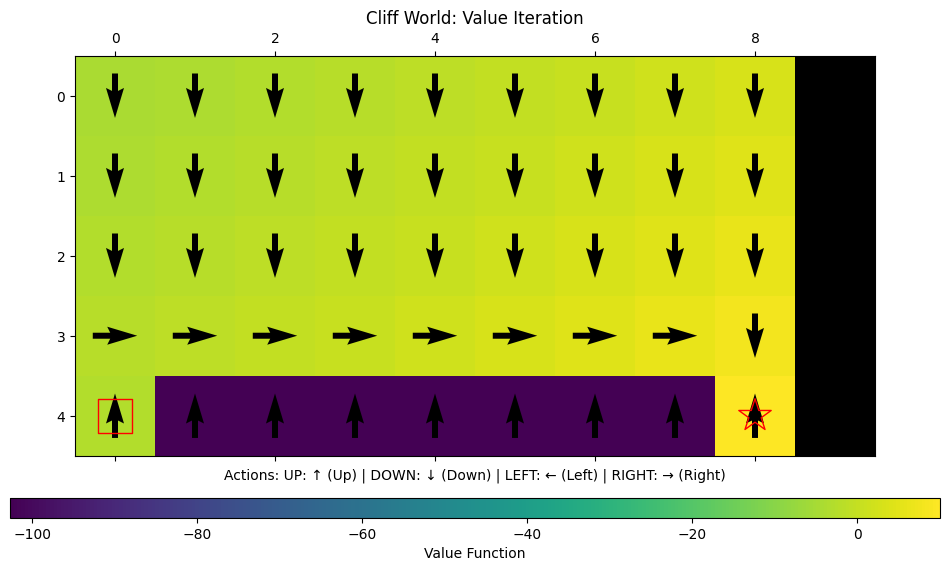

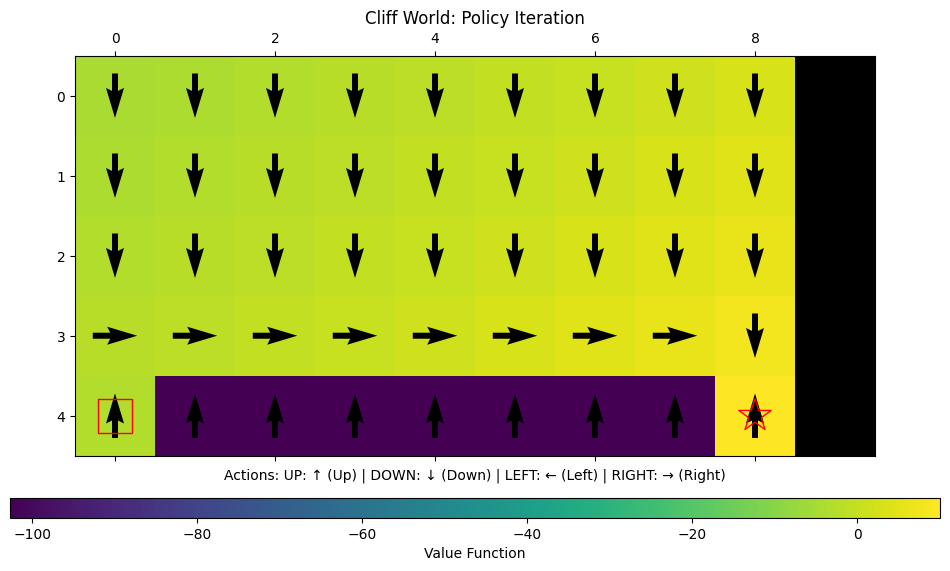

 25%|██▌       | 25/100 [00:00<00:00, 117.12it/s]


✅ Synchronous value iteration converged after 26 iterations for WorldConfig(num_cols=4, num_rows=4, start_cell=Cell(row=0, col=0), goal_cell=Cell(row=3, col=3), obstacle_cells=[Cell(row=1, col=1), Cell(row=2, col=1), Cell(row=1, col=2)], bad_cells=[], prob_good_trans=0.8, bias=0.5, reward_step=-1.0, reward_goal=10.0, reward_bad=-6, gamma=0.9, world_name='Small World', return_to_start_from_bad_state=False).


  5%|▌         | 5/100 [00:00<00:02, 34.60it/s]


✅ breaking for Small World


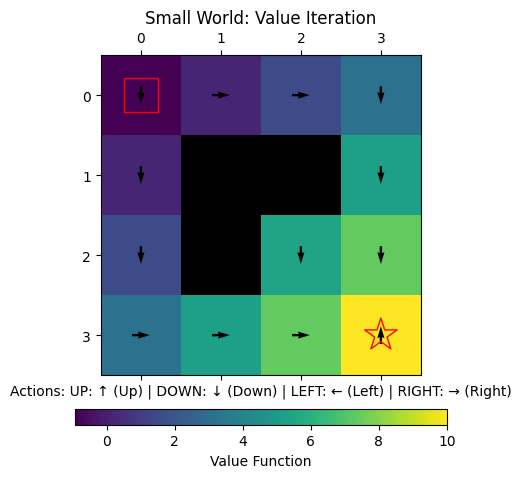

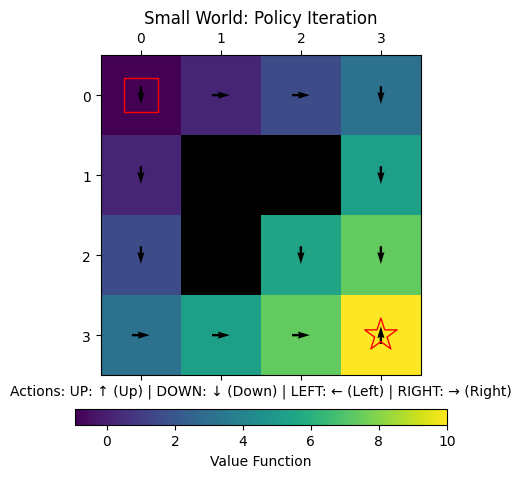

 64%|██████▍   | 64/100 [00:23<00:13,  2.74it/s]


✅ Synchronous value iteration converged after 65 iterations for WorldConfig(num_cols=12, num_rows=9, start_cell=Cell(row=0, col=1), goal_cell=Cell(row=7, col=8), obstacle_cells=[Cell(row=8, col=6), Cell(row=7, col=6), Cell(row=6, col=6), Cell(row=5, col=6), Cell(row=4, col=6), Cell(row=3, col=6), Cell(row=3, col=7), Cell(row=3, col=8), Cell(row=3, col=9)], bad_cells=[Cell(row=2, col=1)], prob_good_trans=0.7, bias=0.5, reward_step=-1.0, reward_goal=10.0, reward_bad=-6.0, gamma=0.9, world_name='Grid World', return_to_start_from_bad_state=False).


  9%|▉         | 9/100 [00:11<01:53,  1.25s/it]

✅ breaking for Grid World


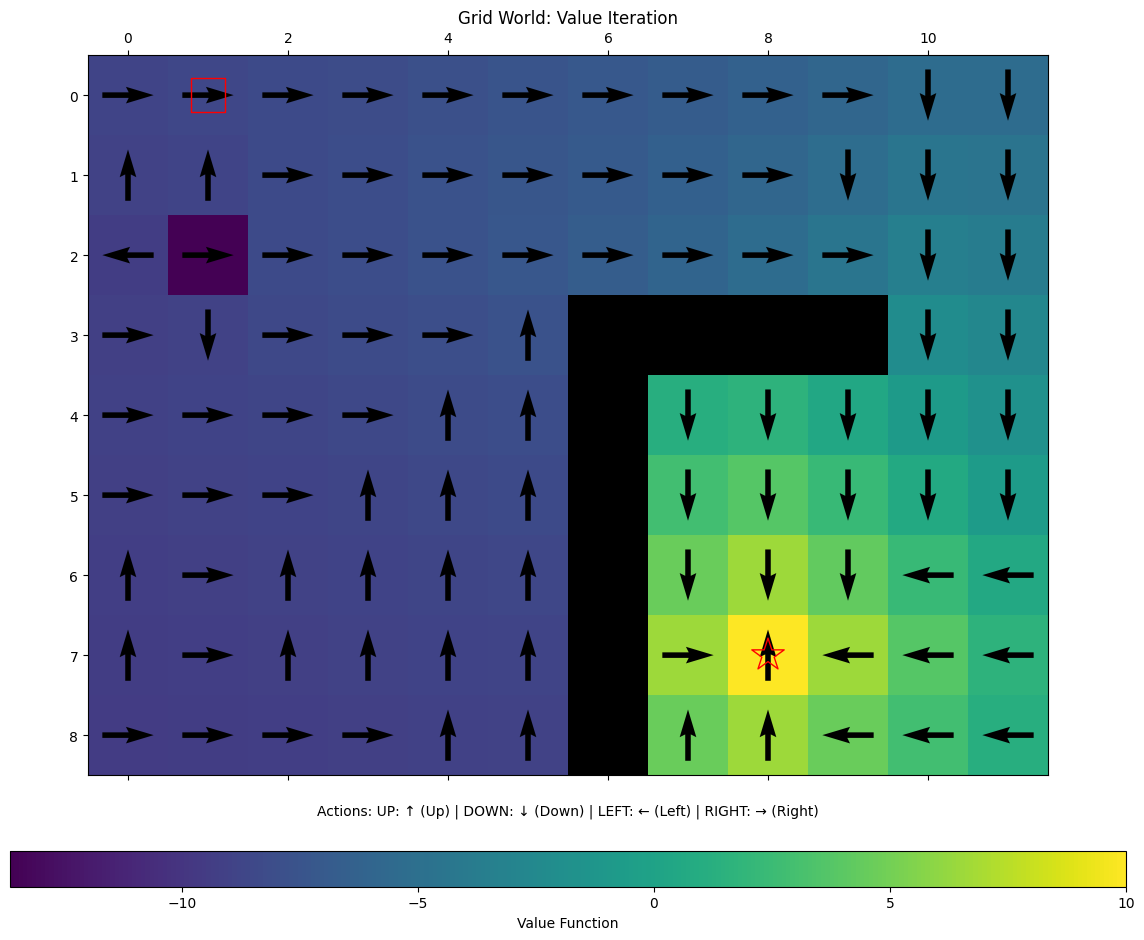

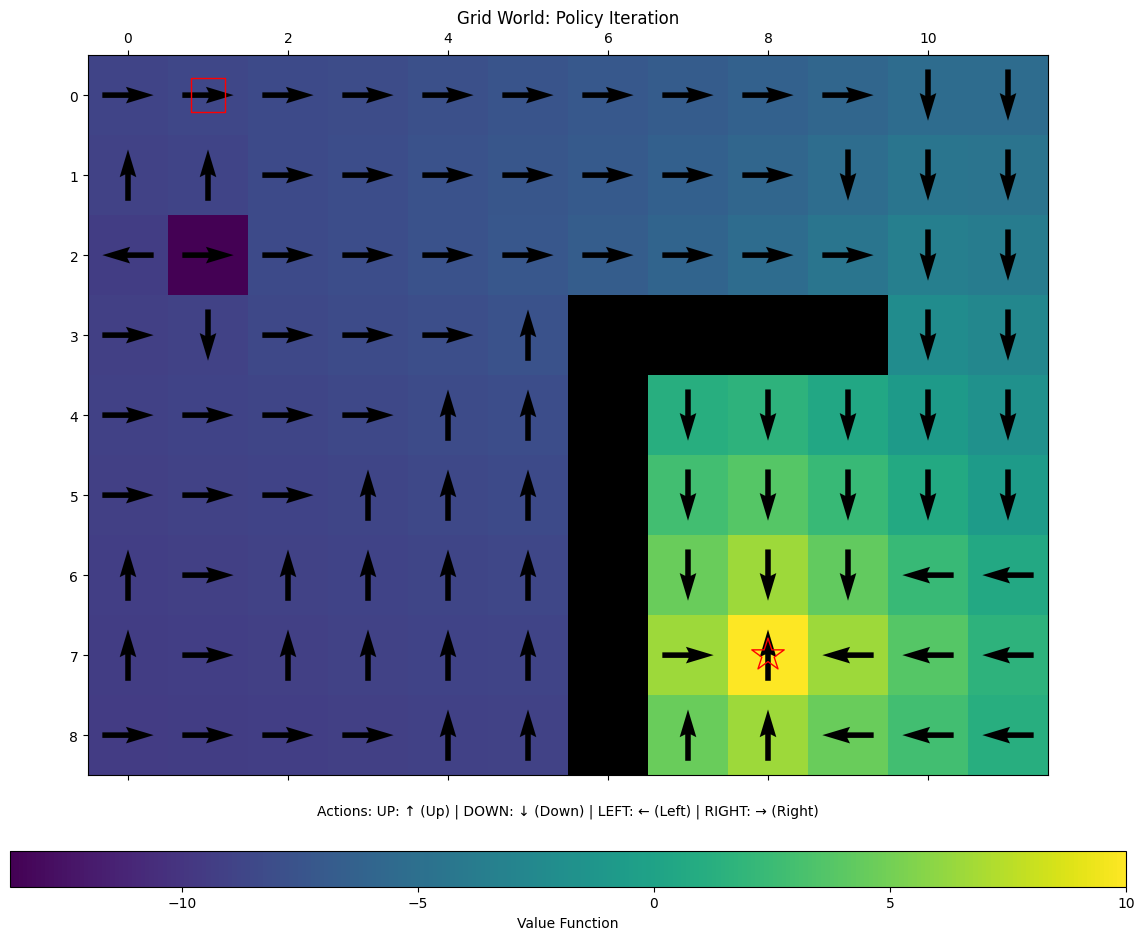

In [2]:
QUESTION = "QUESTION A1"

# run the main for each world
world_model = [cliff_world, small_world, grid_world]


for models in world_model:
    model = Model(models)
    VI = ValueIteration(model, models, maxit=100)
    
    TASK_A1 = f"VI_implementation_A1_{model.world.world_name}"
    TASK_A1_PI = f"PI_implementation_A1_{model.world.world_name}"
    
    V, pi, history = VI.sync_value_iteration()
    V_PI, pi_PI, history_PI = policy_iteration(model, world_name=model.world.world_name)

    # plot_vp(model, V, pi)
    plot_vp(model, V, pi, model.world.world_name, QUESTION, plot_title="Value Iteration", task=TASK_A1, show = True, save=True)
    plot_vp(model, V_PI, pi_PI, model.world.world_name, QUESTION, plot_title="Policy Iteration", task=TASK_A1_PI, show = True, save=True)
    plt.show()

### A.2) Stopping Criteria



A suitable stopping criteria has been implemented for the value iteration function: a small threshold called $\epsilon$ (epsilon, *tol* in the code), for all states. It means that the value function has converged and further iterations will not significantly change the policy. 

As stated in the RL book, this can be expressed as:

$$
\max_{s} |V_{k+1}(s) - V_{k}(s)| < \epsilon
$$

where $ V_{k}(s) $ is the value of state $s $ at iteration $k $ and $\epsilon $ is a small positive number.

### A.3) Contrast with Policy Iteration



In Policy Iteration, the stopping criteria is when the policy does not change anymore. This is because the policy is evaluated and improved in each iteration. In contrast, Value Iteration does not require the policy to be evaluated and improved in each iteration. Instead, it updates the value function until it converges. In both techniques, they should converge to the same optimal policy. Both algorithms solve the same Bellman optimality equation, which guarantees convergence to $\pi^*$. However, the way they compute the optimal policy is different. Policy is stable if the policy improvement step does not change the policy ($\pi$) anymore:

\begin{equation}
\pi_{k+1}(s) = \pi_{k}(s) \quad \forall s
\end{equation}

Value Iteration is stable if the value function does not change anymore:

\begin{equation}
V_{k+1}(s) = V_{k}(s) \quad \forall s
\end{equation}

So one relies its stopping criteria on the policy and the other on the value function.



A good way of checking the difference between the two methods is to compare the number of iterations required to converge. Since both methods

 13%|█▎        | 13/100 [00:00<00:06, 14.33it/s]


✅ Synchronous value iteration converged after 14 iterations for [WorldConfig(num_cols=10, num_rows=5, start_cell=Cell(row=4, col=0), goal_cell=Cell(row=4, col=8), obstacle_cells=[Cell(row=0, col=9), Cell(row=1, col=9), Cell(row=2, col=9), Cell(row=3, col=9), Cell(row=4, col=9)], bad_cells=[Cell(row=4, col=1), Cell(row=4, col=2), Cell(row=4, col=3), Cell(row=4, col=4), Cell(row=4, col=5), Cell(row=4, col=6), Cell(row=4, col=7)], prob_good_trans=1.0, bias=0.0, reward_step=-1.0, reward_goal=10.0, reward_bad=-100.0, gamma=0.9, world_name='Cliff World', return_to_start_from_bad_state=True), WorldConfig(num_cols=4, num_rows=4, start_cell=Cell(row=0, col=0), goal_cell=Cell(row=3, col=3), obstacle_cells=[Cell(row=1, col=1), Cell(row=2, col=1), Cell(row=1, col=2)], bad_cells=[], prob_good_trans=0.8, bias=0.5, reward_step=-1.0, reward_goal=10.0, reward_bad=-6, gamma=0.9, world_name='Small World', return_to_start_from_bad_state=False), WorldConfig(num_cols=12, num_rows=9, start_cell=Cell(row=0, c

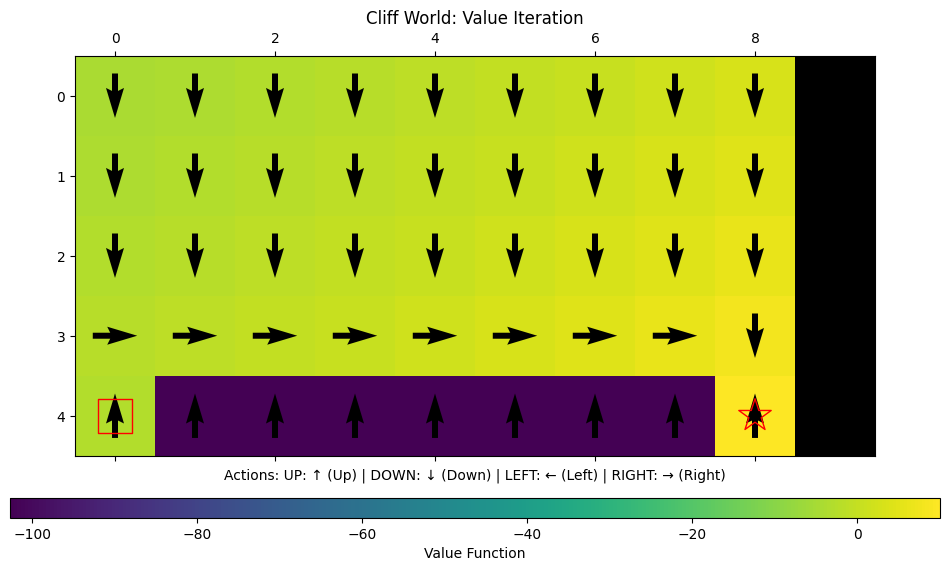

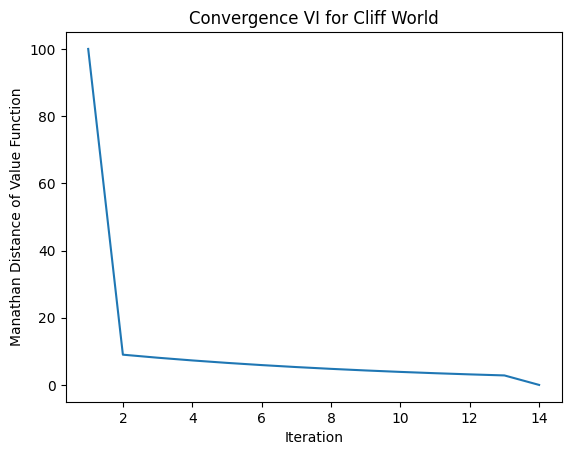

 12%|█▏        | 12/100 [00:02<00:20,  4.28it/s]

✅ breaking for Cliff World


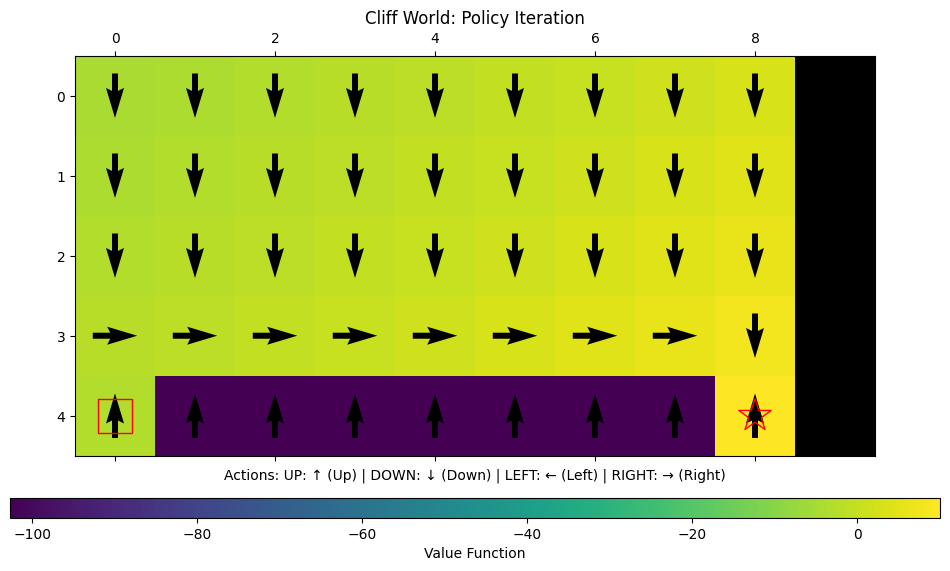

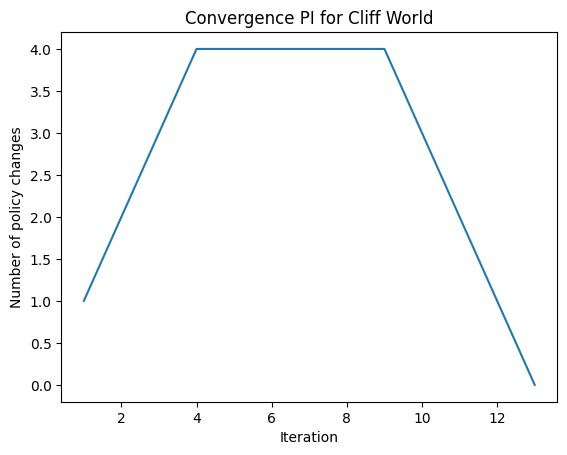

 25%|██▌       | 25/100 [00:00<00:00, 126.40it/s]


✅ Synchronous value iteration converged after 26 iterations for [WorldConfig(num_cols=10, num_rows=5, start_cell=Cell(row=4, col=0), goal_cell=Cell(row=4, col=8), obstacle_cells=[Cell(row=0, col=9), Cell(row=1, col=9), Cell(row=2, col=9), Cell(row=3, col=9), Cell(row=4, col=9)], bad_cells=[Cell(row=4, col=1), Cell(row=4, col=2), Cell(row=4, col=3), Cell(row=4, col=4), Cell(row=4, col=5), Cell(row=4, col=6), Cell(row=4, col=7)], prob_good_trans=1.0, bias=0.0, reward_step=-1.0, reward_goal=10.0, reward_bad=-100.0, gamma=0.9, world_name='Cliff World', return_to_start_from_bad_state=True), WorldConfig(num_cols=4, num_rows=4, start_cell=Cell(row=0, col=0), goal_cell=Cell(row=3, col=3), obstacle_cells=[Cell(row=1, col=1), Cell(row=2, col=1), Cell(row=1, col=2)], bad_cells=[], prob_good_trans=0.8, bias=0.5, reward_step=-1.0, reward_goal=10.0, reward_bad=-6, gamma=0.9, world_name='Small World', return_to_start_from_bad_state=False), WorldConfig(num_cols=12, num_rows=9, start_cell=Cell(row=0, c

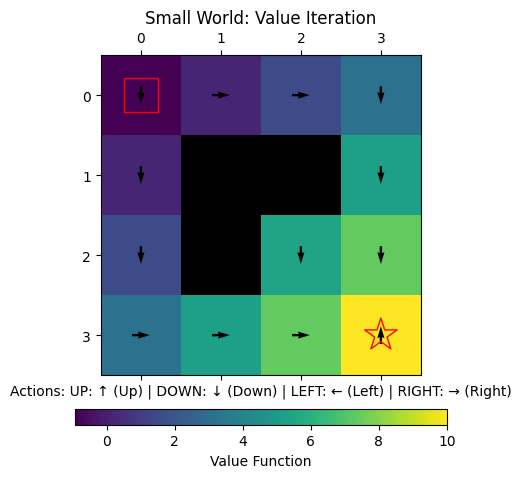

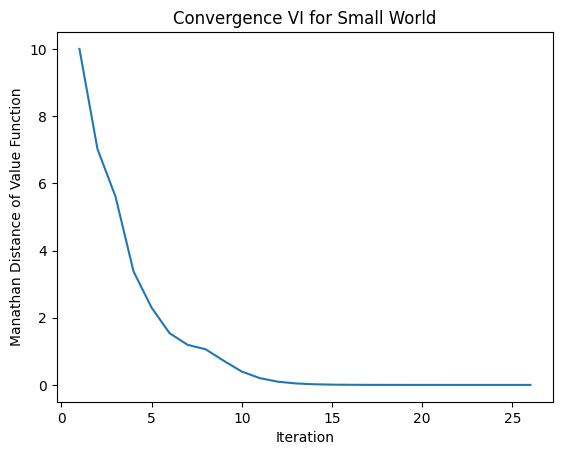

  5%|▌         | 5/100 [00:00<00:02, 33.38it/s]


✅ breaking for Small World


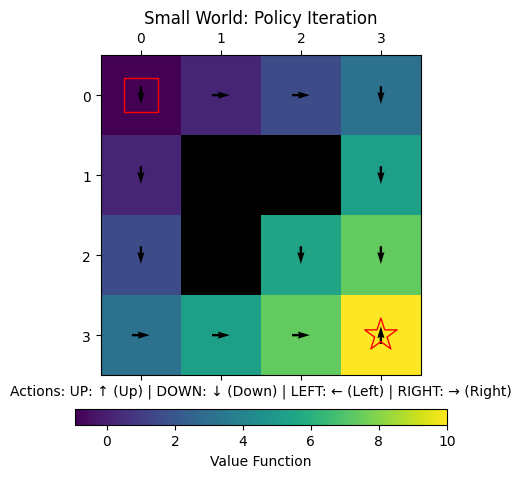

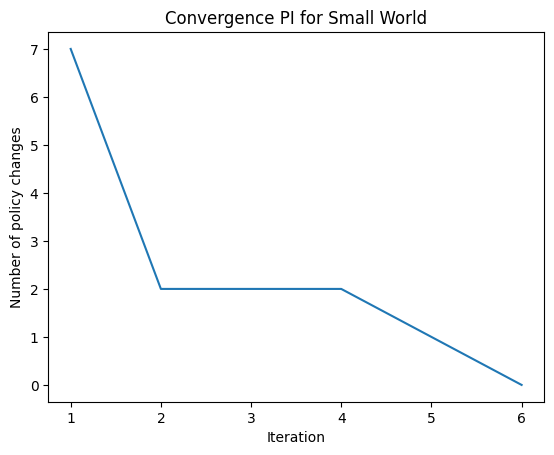

 64%|██████▍   | 64/100 [00:24<00:13,  2.66it/s]

✅ Synchronous value iteration converged after 65 iterations for [WorldConfig(num_cols=10, num_rows=5, start_cell=Cell(row=4, col=0), goal_cell=Cell(row=4, col=8), obstacle_cells=[Cell(row=0, col=9), Cell(row=1, col=9), Cell(row=2, col=9), Cell(row=3, col=9), Cell(row=4, col=9)], bad_cells=[Cell(row=4, col=1), Cell(row=4, col=2), Cell(row=4, col=3), Cell(row=4, col=4), Cell(row=4, col=5), Cell(row=4, col=6), Cell(row=4, col=7)], prob_good_trans=1.0, bias=0.0, reward_step=-1.0, reward_goal=10.0, reward_bad=-100.0, gamma=0.9, world_name='Cliff World', return_to_start_from_bad_state=True), WorldConfig(num_cols=4, num_rows=4, start_cell=Cell(row=0, col=0), goal_cell=Cell(row=3, col=3), obstacle_cells=[Cell(row=1, col=1), Cell(row=2, col=1), Cell(row=1, col=2)], bad_cells=[], prob_good_trans=0.8, bias=0.5, reward_step=-1.0, reward_goal=10.0, reward_bad=-6, gamma=0.9, world_name='Small World', return_to_start_from_bad_state=False), WorldConfig(num_cols=12, num_rows=9, start_cell=Cell(row=0, c

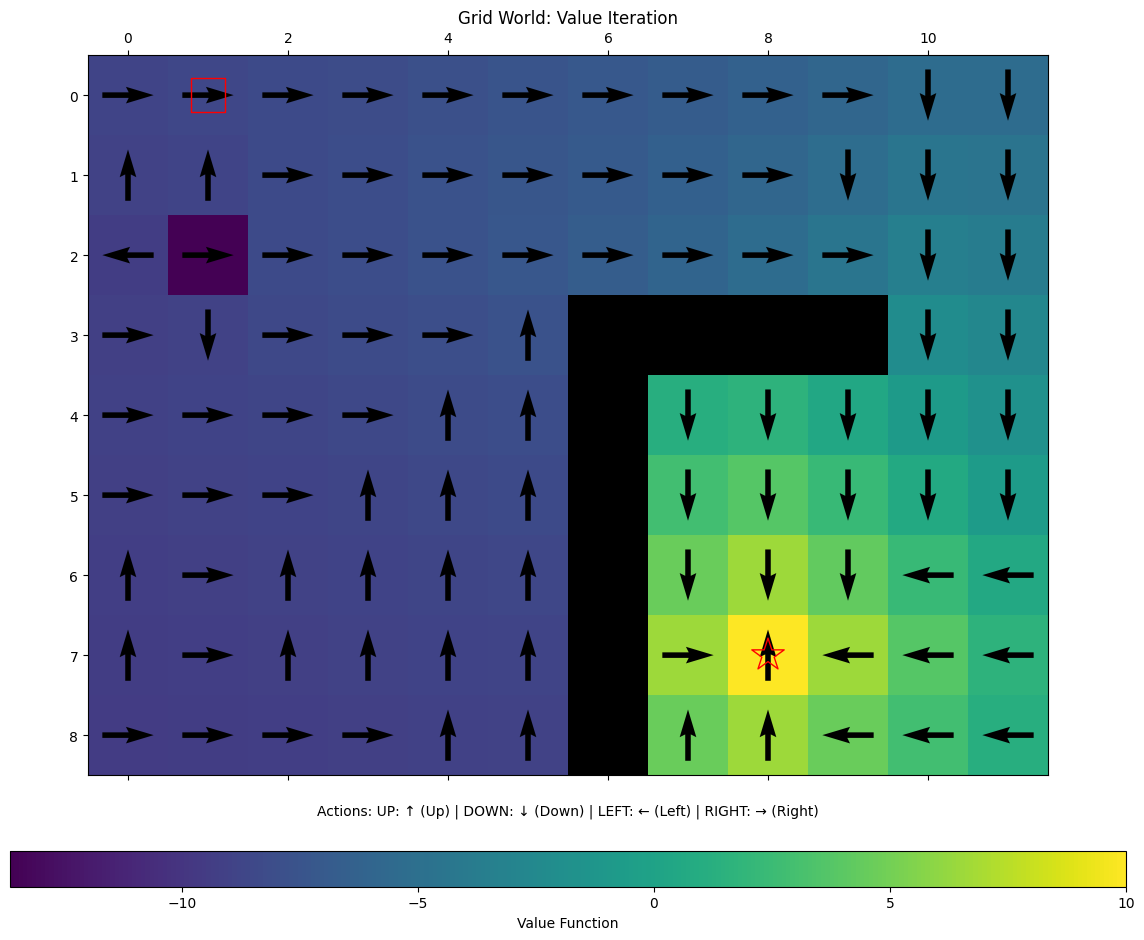

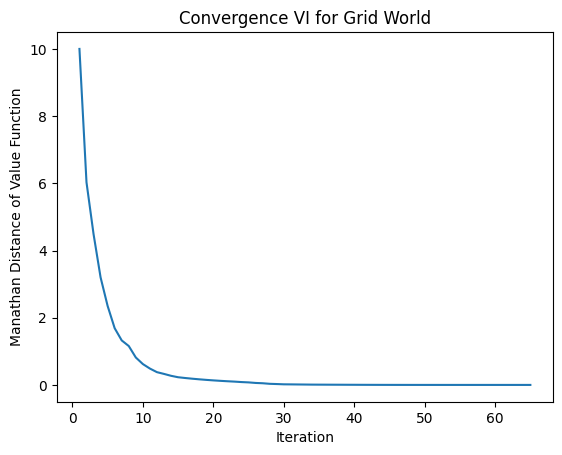

  9%|▉         | 9/100 [00:12<02:03,  1.36s/it]

✅ breaking for Grid World


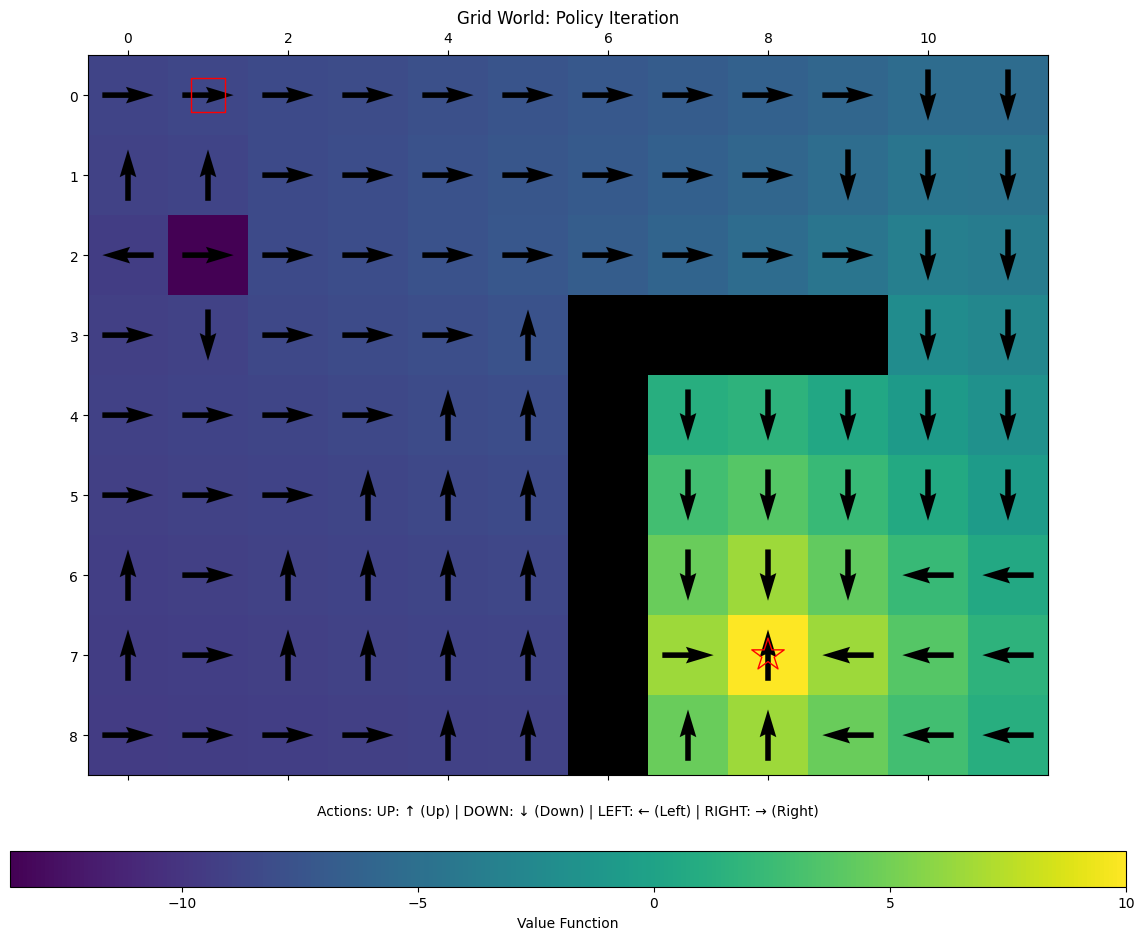

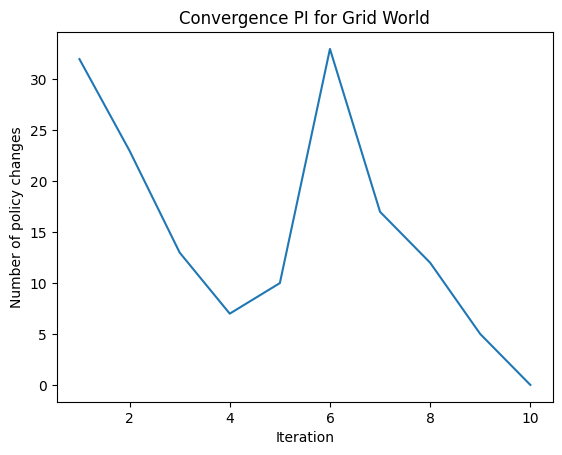

In [15]:
TASK_1 = "Comparison VI"
TASK_2 = "Comparison PI"
TASK_3 = "Convergence VI"
TASK_4 = "Convergence PI"
show = False
# run the main for each world
# world_model = [cliff_world]
world_model = [cliff_world, small_world, grid_world]

QUESTION_A3 = "QUESTION A3"

for i, model in enumerate(world_model):
    model = Model(model)
    
    # Value Iteration
    VI = ValueIteration(model,world_model, maxit=100)
    V_vi, pi_vi, iter_hisotry_VI = VI.sync_value_iteration()
    # Value Iteration plot
    plot_vp(model=model, value_function=V_vi, policy=pi_vi, world_name=model.world.world_name, 
            QUESTION=QUESTION_A3, plot_title=f"Value Iteration", task=TASK_1, show=False, save=False )
    plot_conv(iter_history=iter_hisotry_VI, i=i, world_name=model.world.world_name, question=QUESTION_A3, task=TASK_3, save=True)
    
    # Policy Iteration
    V_pi, pi_pi, iter_hisotry_PI = policy_iteration(model, model.world.world_name, maxit=100)
    # Value Iteration plot
    plot_vp(model=model, value_function=V_pi, policy= pi_vi,world_name=model.world.world_name, 
            plot_title=f"Policy Iteration", QUESTION=QUESTION_A3, task=TASK_2, show=False, save=False )
    plot_conv(iter_history=iter_hisotry_PI, i=i, world_name=model.world.world_name, question=QUESTION_A3, task=TASK_4, save=True)
   

### A.4) Synchronous vs Asynchronous Value Iteration

 13%|█▎        | 13/100 [00:00<00:06, 13.25it/s]


✅ Synchronous value iteration converged after 14 iterations for Cliff World.


 13%|█▎        | 13/100 [00:00<00:06, 13.63it/s]


✅ Asynchronous value iteration converged after 14 iterations for Cliff World.


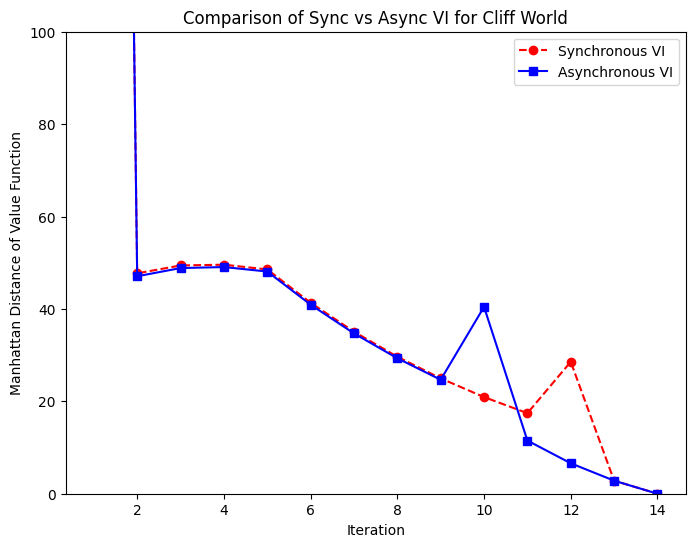

 25%|██▌       | 25/100 [00:00<00:00, 117.98it/s]


✅ Synchronous value iteration converged after 26 iterations for Small World.


 21%|██        | 21/100 [00:00<00:00, 120.78it/s]


✅ Asynchronous value iteration converged after 22 iterations for Small World.


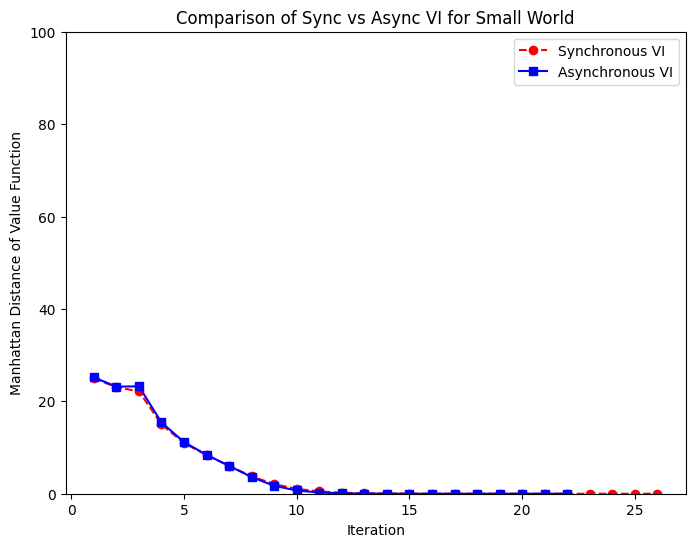

 64%|██████▍   | 64/100 [00:23<00:13,  2.68it/s]


✅ Synchronous value iteration converged after 65 iterations for Grid World.


 40%|████      | 40/100 [00:14<00:22,  2.69it/s]

✅ Asynchronous value iteration converged after 41 iterations for Grid World.


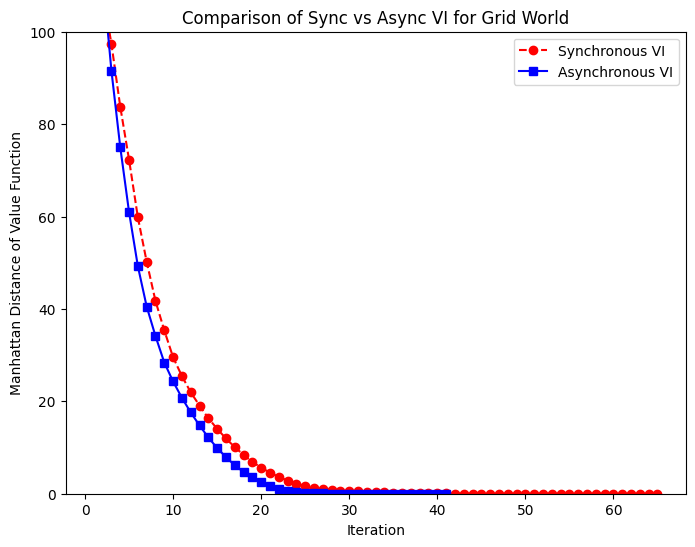

In [12]:
TASK_A4 = "VI_implementation_A4_Async_Sync"
QUESTION_A4 = "QUESTION A4"
show = False

# world_model = [cliff_world]
world_model = [cliff_world, small_world, grid_world]

for i, model in enumerate(world_model):
    model = Model(model)
    
    # Value Iteration Sync
    V_vi_sync, pi_vi_sync, iter_hisotry_VI_sync = ValueIteration(model, model.world.world_name, maxit=100 ).sync_value_iteration()    # Value Iteration Async
    V_vi_async, pi_vi_async, iter_hisotry_VI_async = ValueIteration(model, model.world.world_name, maxit=100 ).async_value_iteration()
    
    plot_comparative_conv(iter_hisotry_VI_sync, iter_hisotry_VI_async, i, model.world.world_name, QUESTION_A4, TASK_A4)

### A.5) Computational Efficiency

We can say that the Policy Iteration is ....

## Question B (**20%**)



1. Implement the SARSA algorithm and run it on small_world.
2. Discuss how to set:
    - Learning rate $\alpha$
    - Exploration parameter $\epsilon$
    - Maximum number of iterations per episode and the number of episodes.
    - Elaborate on what happens if these are too small or too large
    - How you find reasonable values. 

3. Discuss the learned policy. Implement Expected SARSA; which algorithm is more efficient?

### B.1) SARSA Implementation

100%|██████████| 500/500 [00:01<00:00, 261.35it/s]


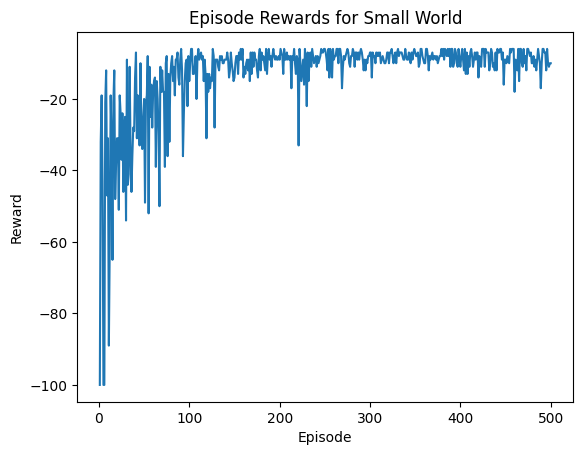

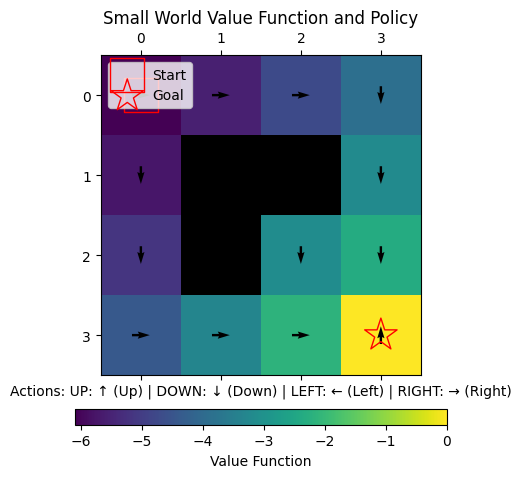

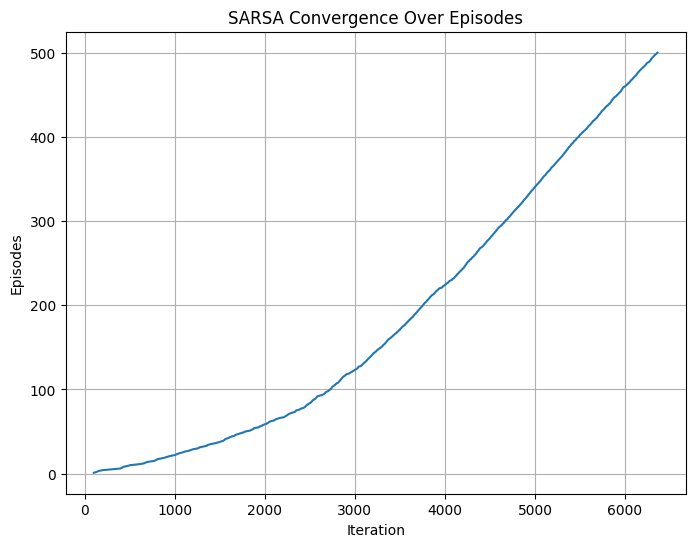

In [3]:
TASK_B1_REWARD = "SARSA_implementation_B1_reward"
TASK_B1_VP = "SARSA_implementation_B1_VP"
TASK_B1_CONVERGENCE = "SARSA_implementation_B1_convergence"
QUESTION_B1 = "QUESTION B1"
show = True

# TODO: plot the episode vs total reward

world_model = [small_world]
# world_model = [cliff_world, small_world, grid_world]

for i, model in enumerate(world_model):
    model = Model(model)
    sarsa = Sarsa(model, model.world.world_name, maxit=100, episode=500, alpha=0.1, epsilon=0.1)
    
    Q, iter_history_sarsa, V, pi, rewards, iter_episdode = sarsa.on_policy_sarsa()
    plot_reward(rewards, model.world.world_name, QUESTION_B1, TASK_B1_REWARD, show=True)
    plot_vp(model, V, pi, model.world.world_name, QUESTION_B1, TASK_B1_VP, show=True)
    plot_sarsa_convergence(iter_episdode, model.world.world_name, QUESTION_B1, TASK_B1_CONVERGENCE)


### **B.2) Discuss How to Set SARSA Hyperparameters**
SARSA has **four key hyperparameters** that influence its learning process:



#### **1. Learning Rate $\alpha $**
- **Controls how much new information overrides old estimates.**
- **Typical range:** $0.1 \leq \alpha \leq 0.5 $.
- **Effects:**
  - If **too high** ($\alpha \to 1 $), learning is unstable.
  - If **too low** ($\alpha \to 0 $), learning is too slow.

🔹 **How to Tune $\alpha $:**
- Start with $\alpha = 0.1 $ and increase if learning is slow.
- **Decay $\alpha $ over time** to improve stability.

**Theoretical Bounds**
$$
0 < \alpha \leq 1
$$
- $\alpha > 0$ is necessary for learning to take place.
- $\alpha \leq 1$ ensures that the update is **bounded** and doesn’t overshoot.

**Practical Recommendations**
- **Decay Over Time:** To ensure convergence, $\alpha$ should **decrease** over time:
  $$
  \alpha_t = \frac{1}{1 + t}
  $$
- **Upper Bound Consideration:**
  - If **$\alpha = 1$** → The agent **completely forgets old experiences**, making learning unstable.
  - If **$\alpha$ is too small**, learning is **very slow**.

#### **2. Exploration Parameter $\epsilon $**
- **Balances exploration vs. exploitation.**
- **Typical range:** $0.01 \leq \epsilon \leq 0.2 $.
- **Effects:**
  - If **too high** ($\epsilon \to 1 $), agent explores too much (acts randomly).
  - If **too low** ($\epsilon \to 0 $), agent gets stuck in suboptimal policies.

🔹 **How to Tune $\epsilon $:**
- Start with $\epsilon = 0.1 $ and **decay over time**:
  $$
  \epsilon_t = \epsilon_0 \times 0.99^t
  $$
- This ensures early exploration but more exploitation later.

**Theoretical Bounds**
$$
0 \leq \epsilon \leq 1
$$
- $\epsilon = 0$ → **No exploration** (greedy policy, risk of getting stuck in a suboptimal policy).
- $\epsilon = 1$ → **Pure exploration** (completely random actions, no learning of an optimal policy).

**Practical Recommendations**
- **Decay $\epsilon$ Over Time**:  
  $$
  \epsilon_t = \epsilon_0 \times 0.99^t
  $$
  This ensures **early exploration** and more **exploitation later**.

#### **3. Maximum Iterations per Episode**
- **Prevents infinite loops in non-terminal MDPs.**
- **Typical values:** $50 \leq \text{maxit} \leq 200 $.
- **Effects:**
  - If **too small**, the agent may not reach the goal.
  - If **too large**, computation increases without much gain.

🔹 **How to Tune:**  
- Start with `maxit = 100` and **increase** if episodes often terminate prematurely.

#### **4. Number of Episodes**
- **Controls how long the agent trains.**
- **Typical range:** $500 \leq \text{episodes} \leq 5000 $.
- **Effects:**
  - If **too few**, learning is incomplete.
  - If **too many**, computation time increases.

🔹 **How to Tune:**  
- Monitor the **value function convergence** and **policy stability**.
- Stop training when changes in $Q(s, a) $ become small.


---

#### **5. Testing different hyperparameters for alpha**

We are going to use the small_world environment to test for different values of alpha and epislon and see their results. 
We can run a bayesian optimization with wieght and biases to see the best trade off. 

In [6]:
world_model = [small_world]
print(world_model[0].world_name)

Small World


##### Test for plotting convergence

In [ ]:
TASK_B2_CONVERGENCE = "SARSA_implementation_B2_convergence"
QUESTION_B2 = "QUESTION B2"
show = True

# TODO: plot the episode vs total reward

world_model = [small_world]
# world_model = [cliff_world, small_world, grid_world]

for i, model in enumerate(world_model):
    model = Model(model)
    wandb.init(
        project="MLMI7-RL",
        name=f"{model.world.world_name}_{QUESTION_B2}_{TASK_B2_CONVERGENCE}",
        notes="This run is used for BO for Epsilon and Alpha Hyperparameter sweep"
    )
    
    sarsa = Sarsa(model, model.world.world_name, maxit=100, episode=500, alpha=0.1, epsilon=0.1)
    
    Q, iter_history_sarsa, V, pi, rewards, iter_episdode = sarsa.on_policy_sarsa()
    
    reward_x, reward_y = plot_reward(rewards, model.world.world_name, QUESTION_B2, TASK_B2_CONVERGENCE, show=True, save=False)
    plot_vp(model, V, pi, model.world.world_name, QUESTION_B2, TASK_B2_CONVERGENCE, show=True, save=False)
    conv_x, conv_y = plot_sarsa_convergence(iter_episdode, model.world.world_name, QUESTION_B2, TASK_B2_CONVERGENCE, save=True)
    for i in range(len(reward_x)):
        wandb.log({
            "Q_max": np.max(Q),
            "reward_x": reward_x[i],
            "reward_y": reward_y[i],
            "conv_x": conv_x[i],
            "conv_y": conv_y[i],
        })
    
    wandb.finish()  # Finish the W&B run for this model before starting the next one


##### Hyperparameter sweep with grid search

In [ ]:
TASK_B2_Hyperparam = "SARSA_implementation_B2_Hyperparam_Grid_CONV"
QUESTION_B2 = "QUESTION B2"
show = True

# TODO: plot the episode vs total reward

world_model = [small_world]
# world_model = [cliff_world, small_world, grid_world]

alpha_values = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
epsilon_values =  [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]

convergence_data = {}

for alpha in alpha_values:
    for epsilon in epsilon_values:
        for i, model in enumerate(world_model):
            model = Model(model)
            print(f"✅ Running SARSA on {model.world.world_name} with alpha = {alpha} and epsilon = {epsilon}")  
            TASK_B2_Hyperparam = f"SARSA_implementation_B2_Hyperparam_Grid_CONV_{alpha}_{epsilon}"
            wandb.init(
                project="MLMI7-RL",
                name=f"{model.world.world_name}_{QUESTION_B2}_{TASK_B2_Hyperparam}",
                notes="This run is used for Extreme cases of Epsilon and Alpha Hyperparameter sweep",
                config = {
                    "alpha": alpha,
                    "epsilon": epsilon,
                    "maxit": 100,
                    "episodes": 500
                }
            )
            
            sarsa = Sarsa(model, model.world.world_name, maxit=100, episode=500, alpha=alpha, epsilon=epsilon)
            
            Q, iter_history_sarsa, V, pi, rewards, iter_episdode = sarsa.on_policy_sarsa()
            
            reward_x, reward_y = plot_reward(rewards, model.world.world_name, QUESTION_B2, TASK_B2_Hyperparam, show=False, save=True)
            plot_vp(model, V, pi, model.world.world_name, QUESTION_B2, TASK_B2_Hyperparam, show=False, save=True)
            conv_x, conv_y = plot_sarsa_convergence(iter_episdode, model.world.world_name, QUESTION_B2, TASK_B2_Hyperparam, save=True)
             # Store convergence data
            convergence_data[(alpha, epsilon)] = (conv_x, conv_y)
            for i in range(len(reward_x)):
                wandb.log({
                    "alpha": alpha,
                    "epsilon": epsilon,
                    "Q_max": np.max(Q),
                    "reward_x": reward_x[i],
                    "reward_y": reward_y[i],
                    "conv_x": conv_x[i],
                    "conv_y": conv_y[i]
                })
            
            wandb.finish()  # Finish the W&B run for this model before starting the next one


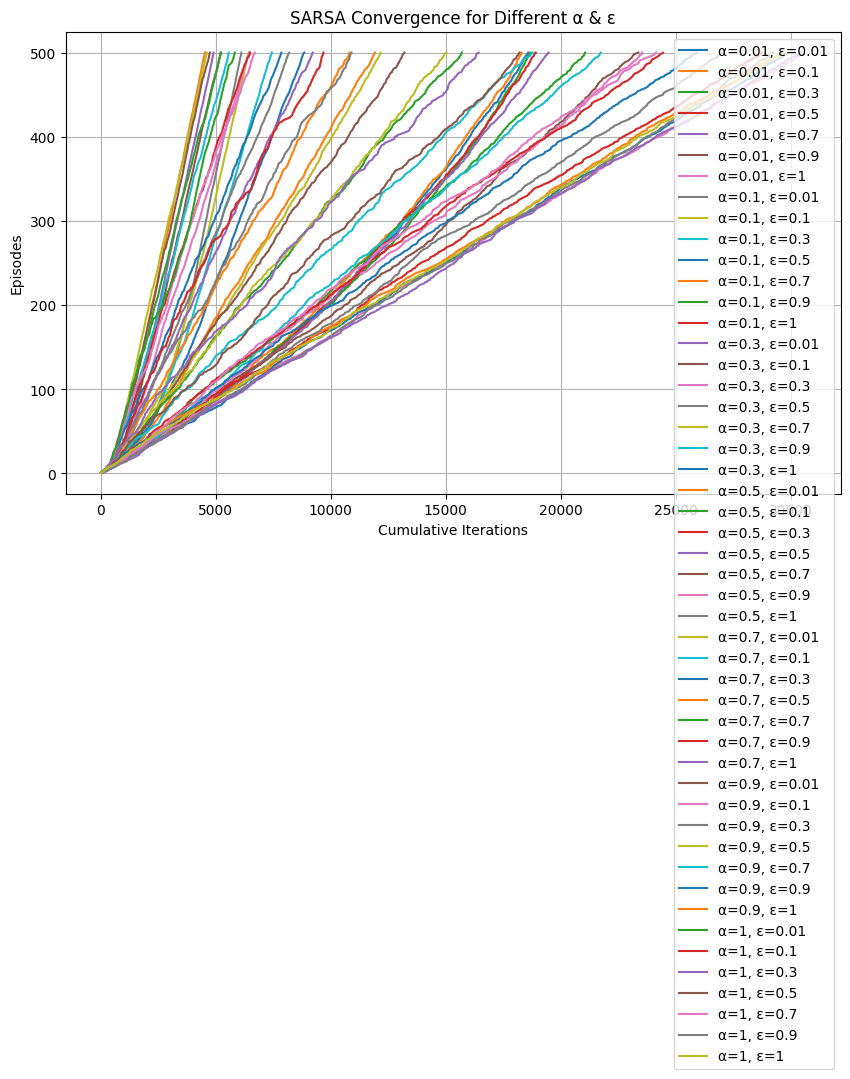

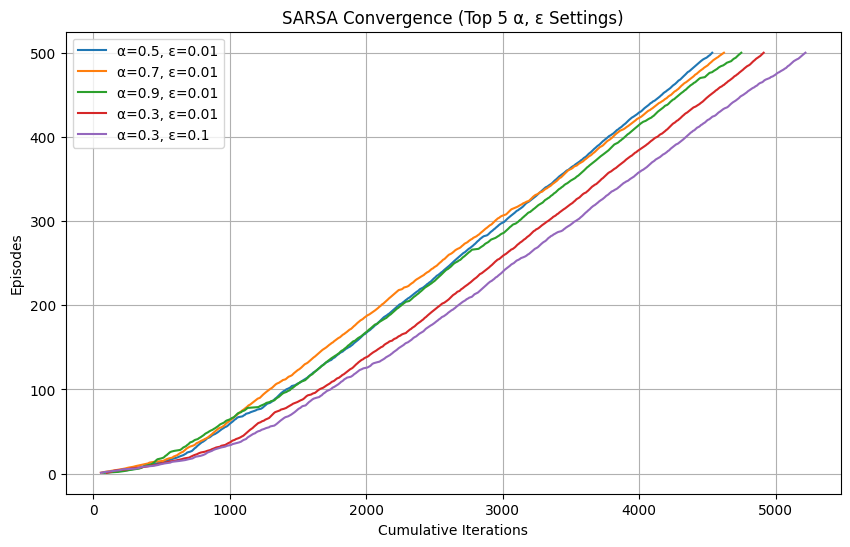

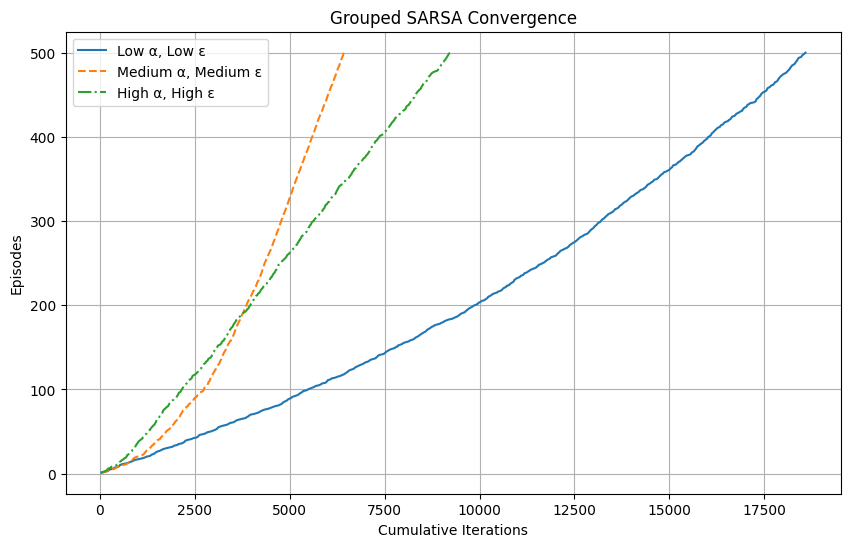

In [6]:
plt.figure(figsize=(10, 6))
    
for (alpha, epsilon), (conv_x, conv_y) in convergence_data.items():
    plt.plot(conv_x, conv_y, label=f"α={alpha}, ε={epsilon}")

plt.xlabel("Cumulative Iterations")
plt.ylabel("Episodes")
plt.title("SARSA Convergence for Different α & ε")
plt.legend()
plt.grid()
plt.show()

import matplotlib.pyplot as plt
import numpy as np

def plot_selected_convergences(convergence_data, num_best=5):
    """
    Plots the SARSA convergence for selected best-performing hyperparameter settings.
    - num_best: The number of best (fastest convergence) settings to display.
    """
    plt.figure(figsize=(10, 6))

    # Compute final iteration count for each (alpha, epsilon) pair
    convergence_speeds = {params: conv_x[-1] for params, (conv_x, conv_y) in convergence_data.items()}

    # Sort by fastest convergence (lower cumulative iterations = better)
    sorted_params = sorted(convergence_speeds, key=convergence_speeds.get)[:num_best]

    for params in sorted_params:
        conv_x, conv_y = convergence_data[params]
        plt.plot(conv_x, conv_y, label=f"α={params[0]}, ε={params[1]}")

    plt.xlabel("Cumulative Iterations")
    plt.ylabel("Episodes")
    plt.title(f"SARSA Convergence (Top {num_best} α, ε Settings)")
    plt.legend()
    plt.grid()
    plt.show()

# Call this after running all experiments
plot_selected_convergences(convergence_data, num_best=5)  # Show only top 5 best settings

import itertools

def plot_grouped_convergences(convergence_data):
    """
    Plots SARSA convergence, grouping hyperparameters into 3 categories:
    - Low α, ε
    - Medium α, ε
    - High α, ε
    """
    plt.figure(figsize=(10, 6))

    # Define groups (low, medium, high values)
    low = [0.001, 0.01]
    medium = [0.1]
    high = [0.5, 0.999]

    # Define line styles for better differentiation
    line_styles = itertools.cycle(["-", "--", "-.", ":"])

    # Categorize curves
    grouped_data = {
        "Low α, Low ε": [],
        "Medium α, Medium ε": [],
        "High α, High ε": []
    }

    for (alpha, epsilon), (conv_x, conv_y) in convergence_data.items():
        if alpha in low and epsilon in low:
            grouped_data["Low α, Low ε"].append((conv_x, conv_y))
        elif alpha in medium and epsilon in medium:
            grouped_data["Medium α, Medium ε"].append((conv_x, conv_y))
        elif alpha in high and epsilon in high:
            grouped_data["High α, High ε"].append((conv_x, conv_y))

    # Plot grouped data with different line styles
    for group, curves in grouped_data.items():
        if curves:
            conv_x_avg = np.mean([x for x, y in curves], axis=0)
            conv_y_avg = np.mean([y for x, y in curves], axis=0)
            plt.plot(conv_x_avg, conv_y_avg, linestyle=next(line_styles), label=group)

    plt.xlabel("Cumulative Iterations")
    plt.ylabel("Episodes")
    plt.title("Grouped SARSA Convergence")
    plt.legend()
    plt.grid()
    plt.show()

# Call this function
plot_grouped_convergences(convergence_data)


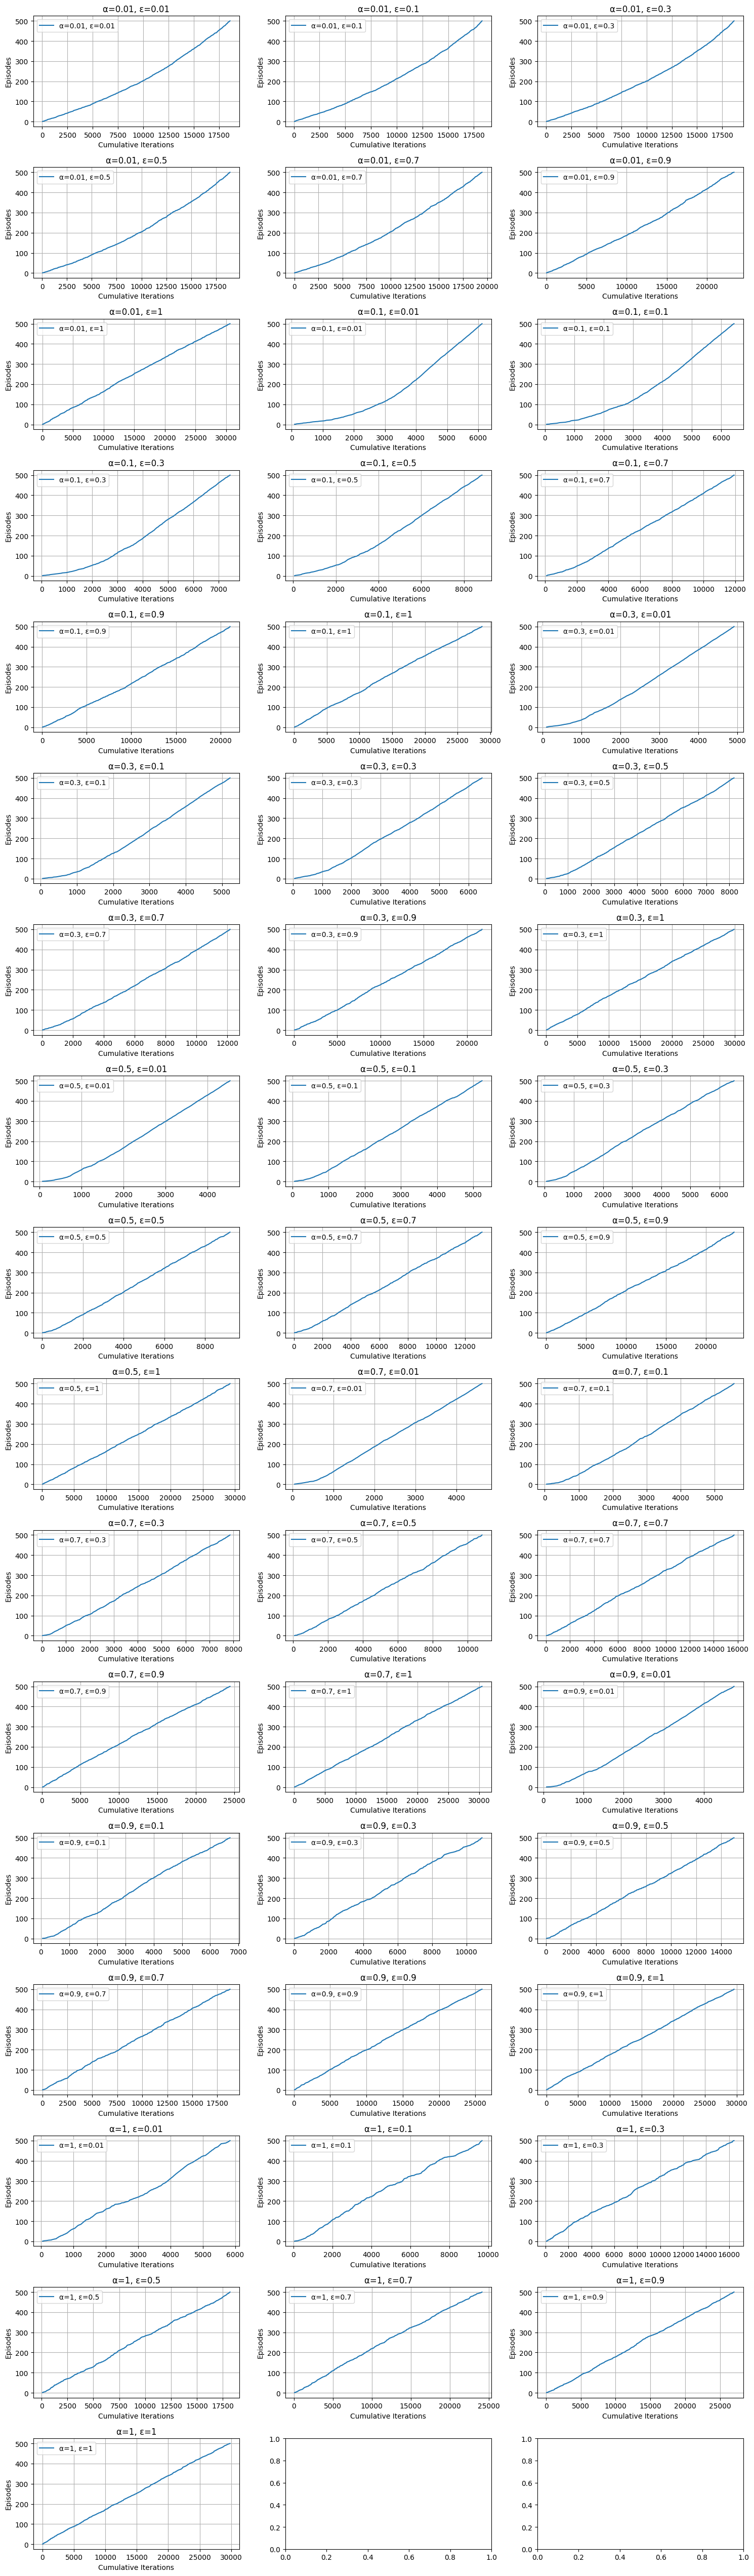

In [7]:
def plot_subplots_convergence(convergence_data):
    """
    Creates subplots for different SARSA hyperparameter settings.
    """
    num_plots = len(convergence_data)
    cols = 3  # Number of columns in subplot
    rows = int(np.ceil(num_plots / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))

    for ax, ((alpha, epsilon), (conv_x, conv_y)) in zip(axes.flat, convergence_data.items()):
        ax.plot(conv_x, conv_y, label=f"α={alpha}, ε={epsilon}")
        ax.set_xlabel("Cumulative Iterations")
        ax.set_ylabel("Episodes")
        ax.set_title(f"α={alpha}, ε={epsilon}")
        ax.legend()
        ax.grid()

    plt.tight_layout()
    plt.show()

# Call this function
plot_subplots_convergence(convergence_data)


##### Hyperparameter sweep with BO search

##### Extreme Conditions

In [ ]:
TASK_B2_EXTREME = "SARSA_implementation_B2_EXTREME_CONV"
QUESTION_B2 = "QUESTION B2"
show = True

# TODO: plot the episode vs total reward

world_model = [small_world]
# world_model = [cliff_world, small_world, grid_world]

alpha_values = [0.001, 0.999]
epsilon_values =  [0.001, 0.999]

for alpha in alpha_values:
    for epsilon in epsilon_values:
        for i, model in enumerate(world_model):
            model = Model(model)
            TASK_B2_EXTREME = f"SARSA_implementation_B2_EXTREME_CONV_{alpha}_{epsilon}"
            wandb.init(
                project="MLMI7-RL",
                name=f"{model.world.world_name}_{QUESTION_B2}_{TASK_B2_EXTREME}",
                notes="This run is used for Extreme cases of Epsilon and Alpha Hyperparameter sweep",
                config = {
                    "alpha": alpha,
                    "epsilon": epsilon,
                    "maxit": 100,
                    "episodes": 500
                }
            )
            
            sarsa = Sarsa(model, model.world.world_name, maxit=100, episode=500, alpha=alpha, epsilon=epsilon)
            
            Q, iter_history_sarsa, V, pi, rewards, iter_episdode = sarsa.on_policy_sarsa()
            
            reward_x, reward_y = plot_reward(rewards, model.world.world_name, QUESTION_B2, TASK_B2_EXTREME, show=True, save=True)
            plot_vp(model, V, pi, model.world.world_name, QUESTION_B2, TASK_B2_EXTREME, show=True, save=True)
            conv_x, conv_y = plot_sarsa_convergence(iter_episdode, model.world.world_name, QUESTION_B2, TASK_B2_EXTREME, save=True)
            for i in range(len(reward_x)):
                wandb.log({
                    "alpha": alpha,
                    "epsilon": epsilon,
                    "Q_max": np.max(Q),
                    "reward_x": reward_x[i],
                    "reward_y": reward_y[i],
                    "conv_x": conv_x[i],
                    "conv_y": conv_y[i]
                })
            
            wandb.finish()  # Finish the W&B run for this model before starting the next one


### B.3) Expected SARSA

For now we are using the preferred hyperparameters which is alpha: 0.3 and epsilon: 0.1

100%|██████████| 500/500 [00:03<00:00, 131.28it/s]


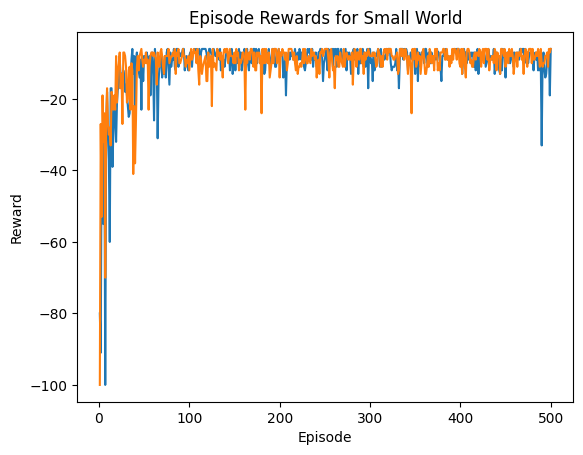

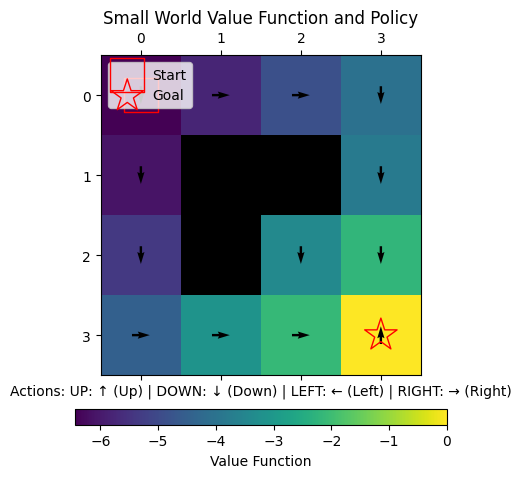

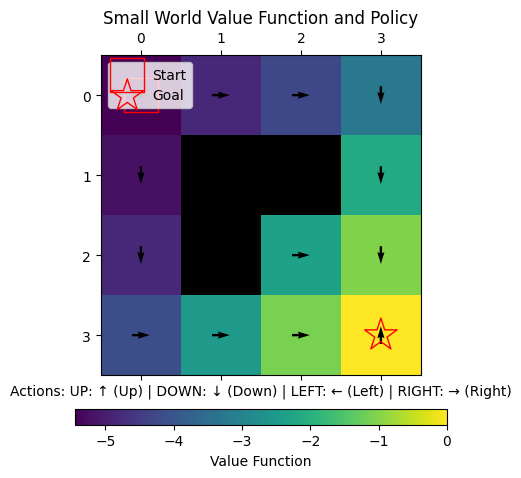

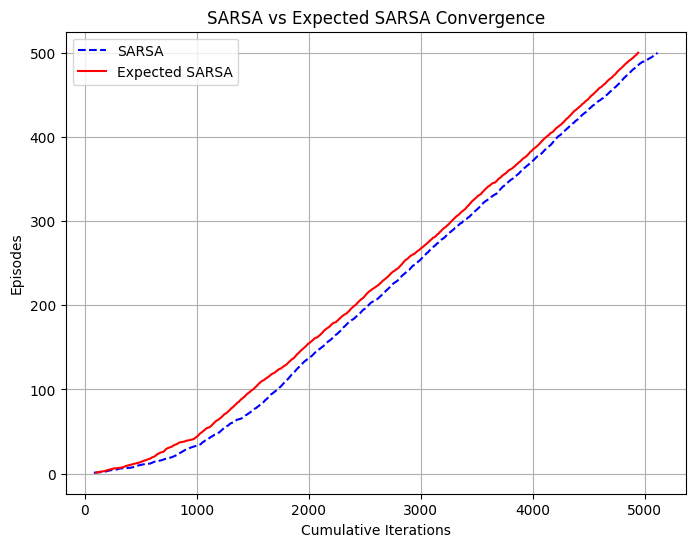

In [3]:
TASK_B3_SARSA = "SARSA_vs_EXPECTED_SARSA"
TASK_B3_SARSA_reward = "SARSA_vs_EXPECTED_SARSA_reward"
QUESTION_B3 = "QUESTION B3"
show = True

# TODO: plot the episode vs total reward

world_model = [small_world]
# world_model = [cliff_world, small_world, grid_world]
   
for i, model in enumerate(world_model):
    model = Model(model)
    wandb.init(
        project="MLMI7-RL",
        name=f"{model.world.world_name}_{QUESTION_B3}_{TASK_B3_SARSA}",
        notes="This run is used for BO for Epsilon and Alpha Hyperparameter sweep"
    )

    sarsa = Sarsa(model, model.world.world_name, maxit=100, episode=500, alpha=0.3, epsilon=0.1)
    exp_sarsa = Expected_SARSA(model, model.world.world_name, maxit=100, episode=500, alpha=0.3, epsilon=0.1)
    
    Q, iter_history_sarsa, V, pi, rewards, iter_episdode = sarsa.on_policy_sarsa()
    Q_exp_sarsa, iter_history_exp_sarsa, V_exp_sarsa, pi_exp_sarsa, rewards_exp_sarsa, iter_episdode_exp_sarsa = exp_sarsa.expected_sarsa()

    reward_x, reward_y, reward_x_exp, reward_y_exp = plot_reward_comparison(rewards, rewards_exp_sarsa, model.world.world_name, QUESTION_B3, TASK_B3_SARSA_reward, show=show, save= True)
    plot_vp(model, V, pi, model.world.world_name, QUESTION_B3, TASK_B3_SARSA, show=show, save= True)
    plot_vp(model, V_exp_sarsa, pi_exp_sarsa, model.world.world_name, QUESTION_B3, TASK_B3_SARSA, show=show, save= True)
    # conv_x, conv_y = plot_sarsa_convergence(iter_episdode_exp_sarsa, model.world.world_name, QUESTION_B3, TASK_B3_SARSA, save=True)
    x_sarsa, y_sarsa, x_exp_sarsa, y_exp_sarsa = plot_sarsa_comparison_convergence(iter_episdode,iter_episdode_exp_sarsa, model.world.world_name, QUESTION_B3, TASK_B3_SARSA, save=True)
    for i in range(len(reward_x)):
        wandb.log({
            "Q_max": np.max(Q),
            "Q_max_exp": np.max(Q_exp_sarsa),
            "reward_x": reward_x[i],
            "reward_y": reward_y[i],
            "conv_x": x_sarsa[i],
            "conv_y": y_sarsa[i],
            "reward_x_exp": reward_x_exp[i],
            "reward_y_exp": reward_y_exp[i],
            "conv_x_exp": x_exp_sarsa[i],
            "conv_y_exp": y_exp_sarsa[i],
        })

    wandb.finish()  # Finish the W&B run for this model before starting the next one


## Question C (20%)



Implement Q-learning algorithm and run it on small_world. 

1. How do you set the parameters?
2. Compare the learned policy and the efficiency to SARSA.

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ab3149 (ab3149-university-of-cambridge) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


100%|██████████| 500/500 [00:04<00:00, 117.71it/s]


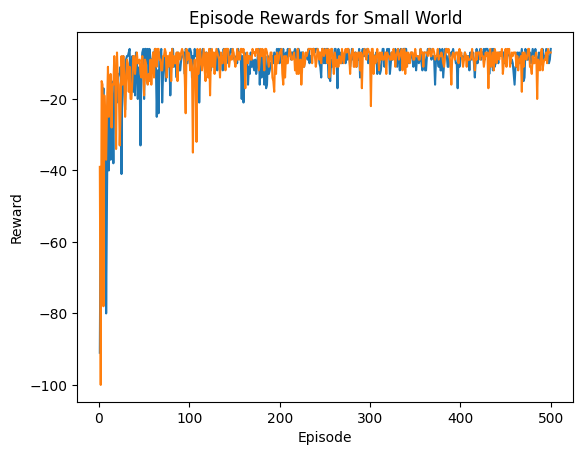

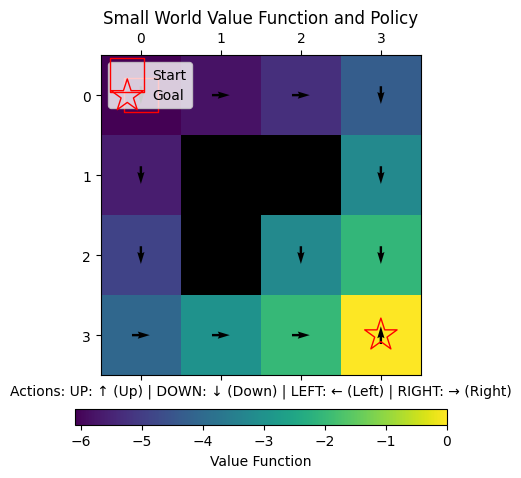

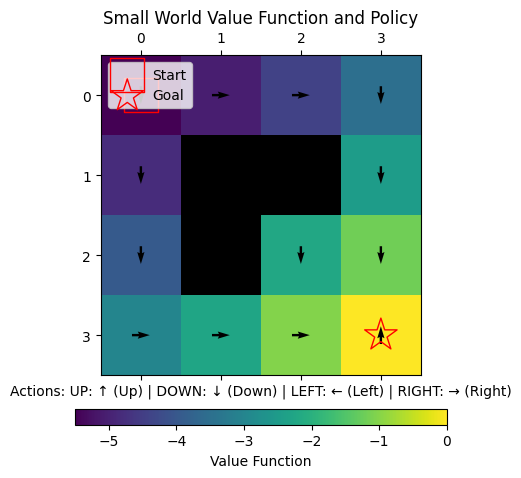

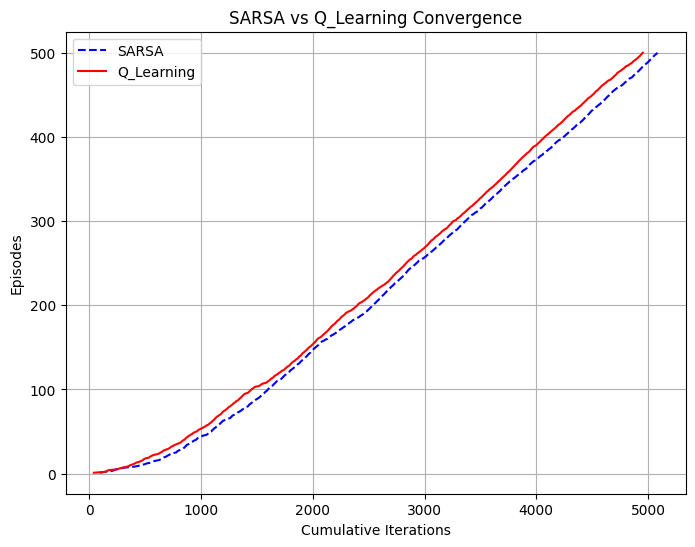

In [2]:
TASK_C_compa = "Sarsa_vs_Q_learning_implementation"
QUESTION_C = "QUESTION C"
show = True

# TODO: plot the episode vs total reward

world_model = [small_world]
# world_model = [cliff_world, small_world, grid_world]

for i, model in enumerate(world_model):
    model = Model(model)
    wandb.init(
        project="MLMI7-RL",
        name=f"{model.world.world_name}_{QUESTION_C}_{TASK_C_compa}",
    )
    sarsa = Sarsa(model, model.world.world_name, maxit=100, episode=500, alpha=0.3, epsilon=0.1)
    q_learning = QL(model, model.world.world_name, maxit=100, episode=500, alpha=0.3, epsilon=0.1)
    
    Q, iter_history_sarsa, V, pi, rewards, iter_episdode = sarsa.on_policy_sarsa()
    ql, iter_snap_ql, V_ql, pi_ql, rewards_ql, iter_episdode_ql = q_learning.q_learning()
        
    reward_x, reward_y, reward_x_exp, reward_y_exp = plot_reward_comparison(rewards, rewards_ql, model.world.world_name, QUESTION_C, TASK_C_compa, show=show, save= True)
    plot_vp(model, V, pi, model.world.world_name, QUESTION_C, TASK_C_compa, show=show, save= True)
    plot_vp(model, V_ql, pi_ql, model.world.world_name, QUESTION_C, TASK_C_compa, show=show, save= True)
    # conv_x, conv_y = plot_sarsa_convergence(iter_episdode_exp_sarsa, model.world.world_name, QUESTION_B3, TASK_B3_SARSA, save=True)
    x_sarsa, y_sarsa, x_exp_ql, y_exp_ql = plot_sarsa_comparison_convergence(iter_episdode, iter_episdode_ql, model.world.world_name, QUESTION_C, TASK_C_compa, save=True)
    for i in range(len(reward_x)):
        wandb.log({
            "Q_max": np.max(Q),
            "Q_max_exp": np.max(ql),
            "reward_x": reward_x[i],
            "reward_y": reward_y[i],
            "conv_x": x_sarsa[i],
            "conv_y": y_sarsa[i],
            "reward_x_exp": reward_x_exp[i],
            "reward_y_exp": reward_y_exp[i],
            "conv_x_exp": x_exp_ql[i],
            "conv_y_exp": y_exp_ql[i],
        })
    
    wandb.finish()  # Finish the W&B run for this model before starting the next one


## Question D (20%)


1. Modify the SARSA and Q-learning algorithms to save the accumulated reward per episode. 
2. Run these algorithms using the cliff_world model and plot the rewards obtained in each episode throughout the learning process. This should look similar to Figure 6.13 from the Sutton and Barto text (http://incompleteideas.net/book/ebook/node65.html#fig:cliff). Your plot may look slightly
different (and likely less smooth) due to the values you choose for $\epsilon$ and $\alpha$. 

3. Describe any significant differences between the learning behavior and performance of SARSA and Q-learning. 

4. Also describe the policies learned by both algorithms at the end of training and estimate their performance. Explain
any significant differences in the policies’ behavior and/or performance

### D.1) Accumulated Reward per Episode

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ab3149 (ab3149-university-of-cambridge) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


100%|██████████| 1000/1000 [00:11<00:00, 84.63it/s] 


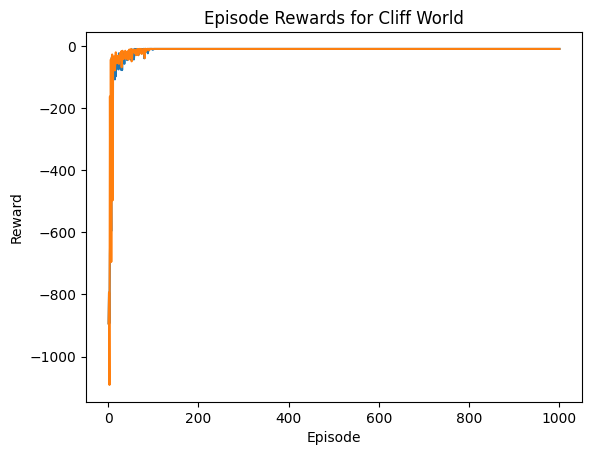

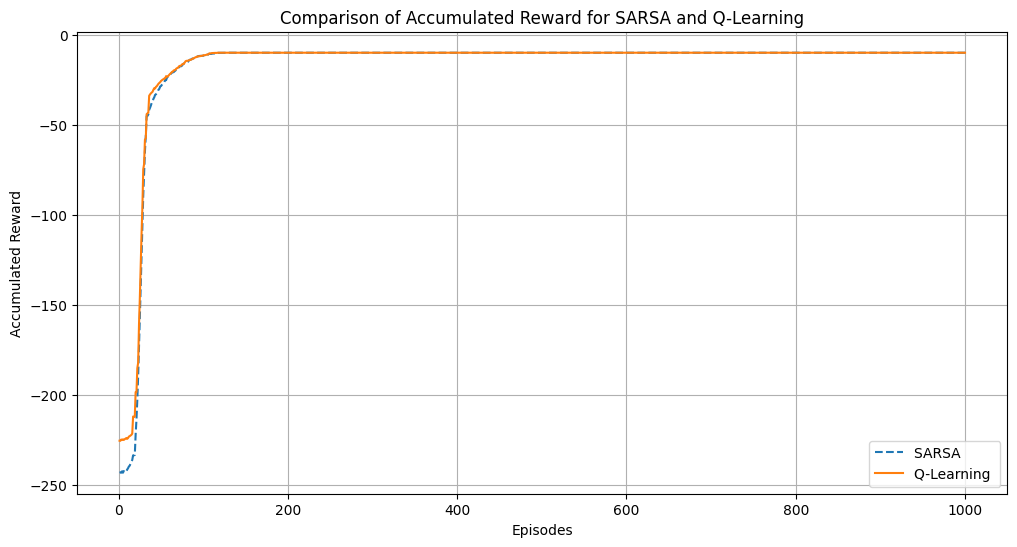

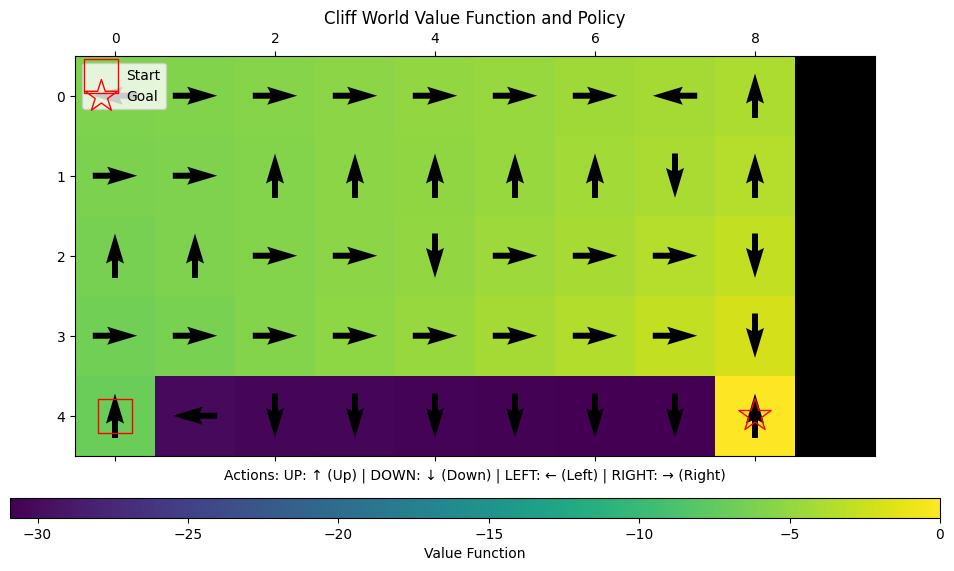

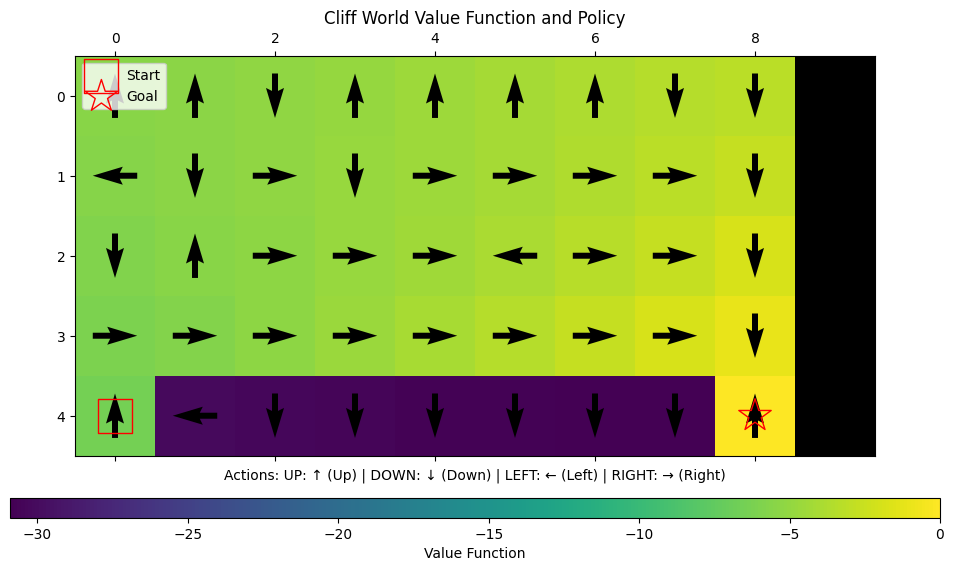

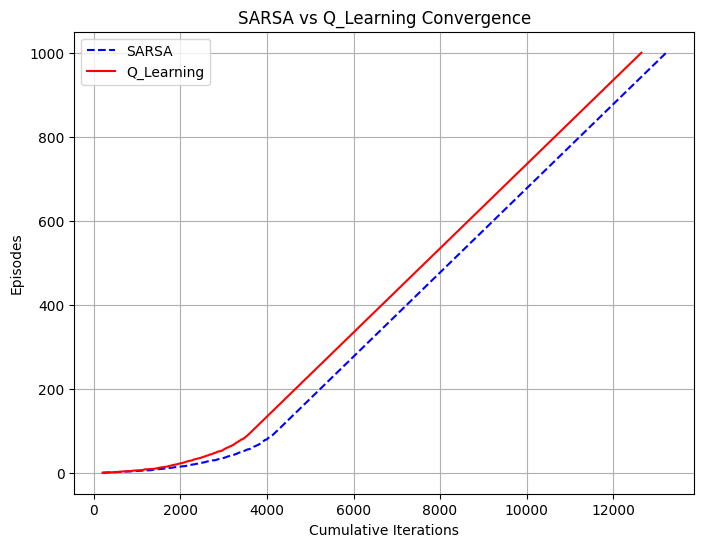

100%|██████████| 1000/1000 [00:11<00:00, 83.41it/s]


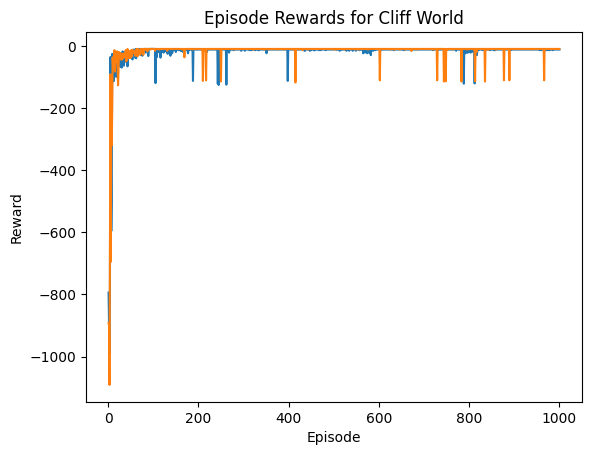

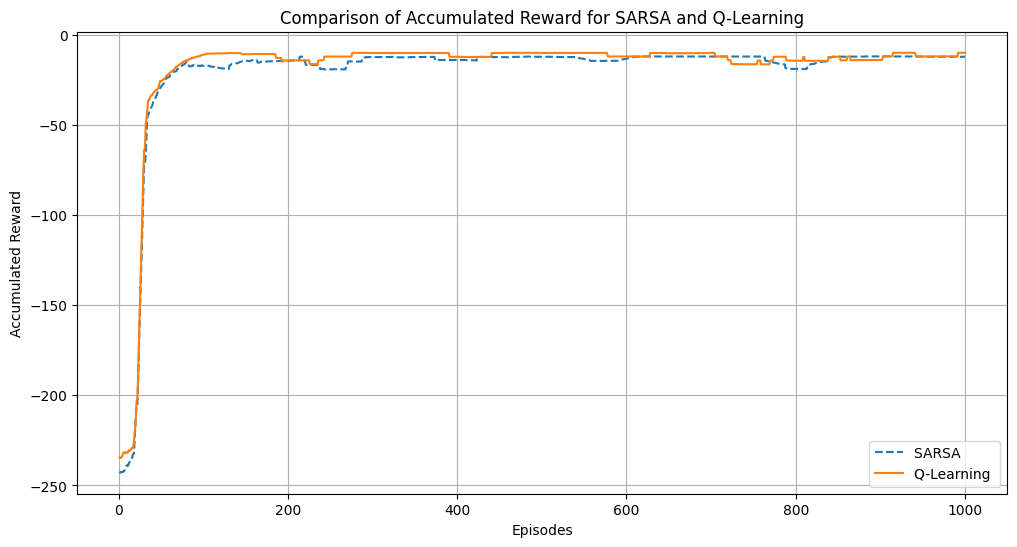

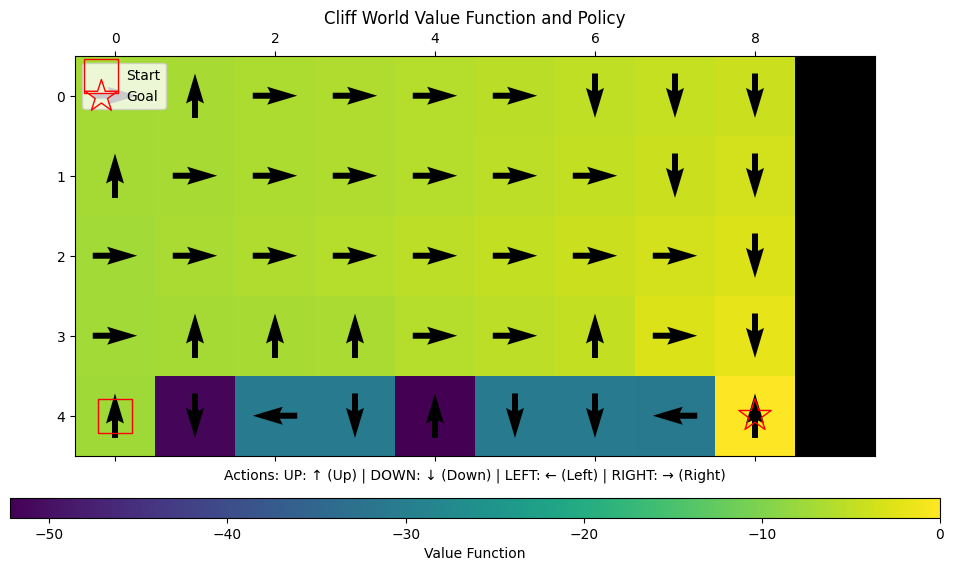

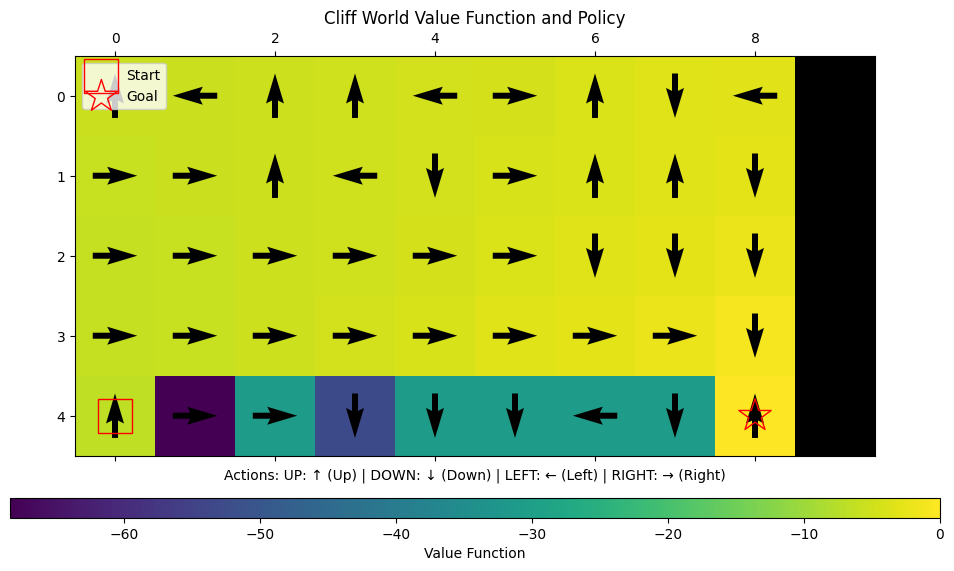

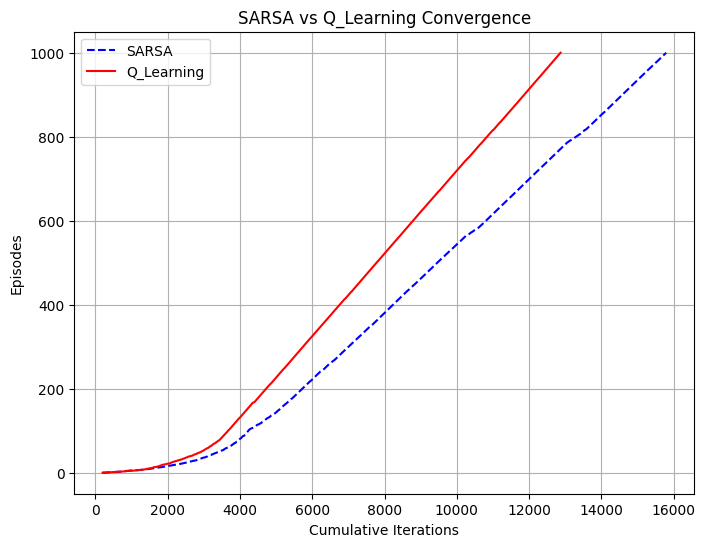

100%|██████████| 1000/1000 [00:14<00:00, 69.84it/s]


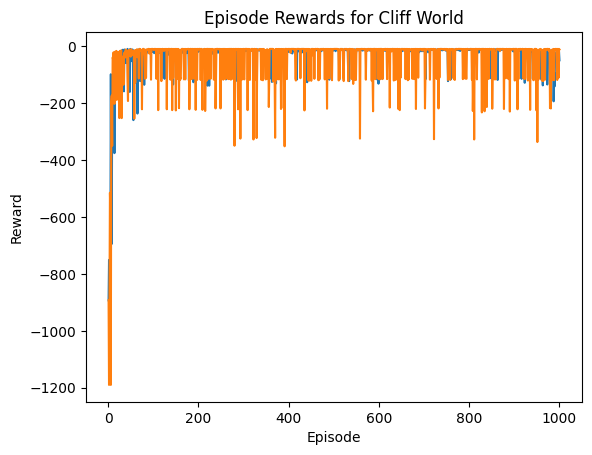

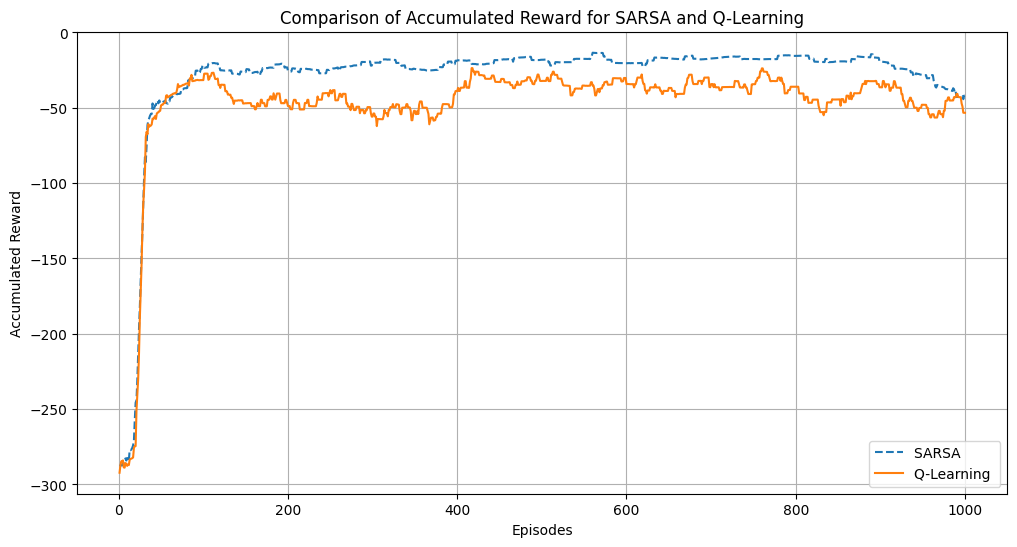

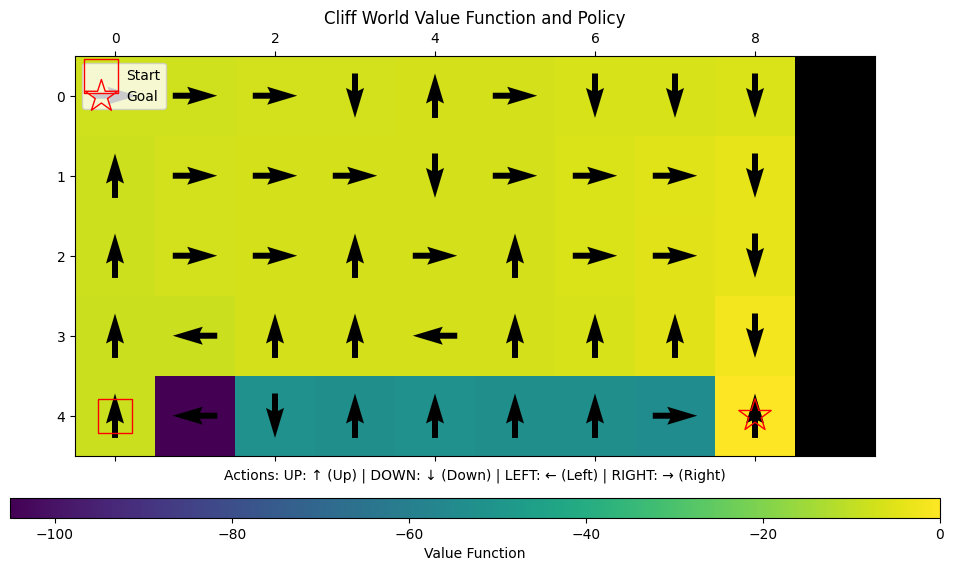

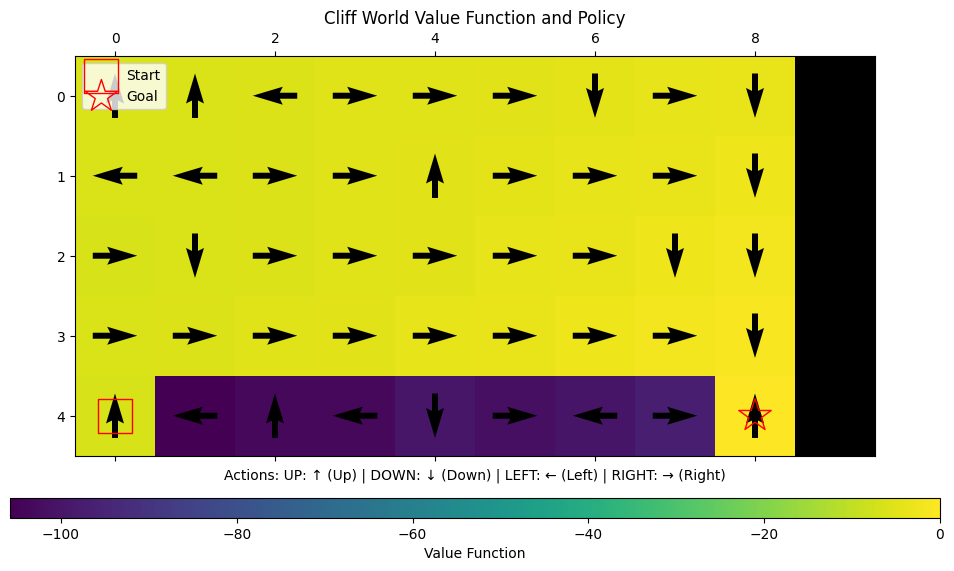

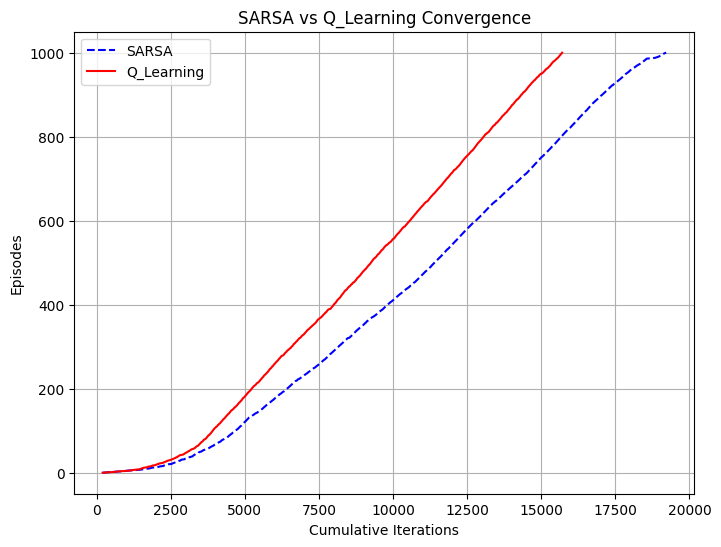

100%|██████████| 1000/1000 [00:20<00:00, 49.39it/s]


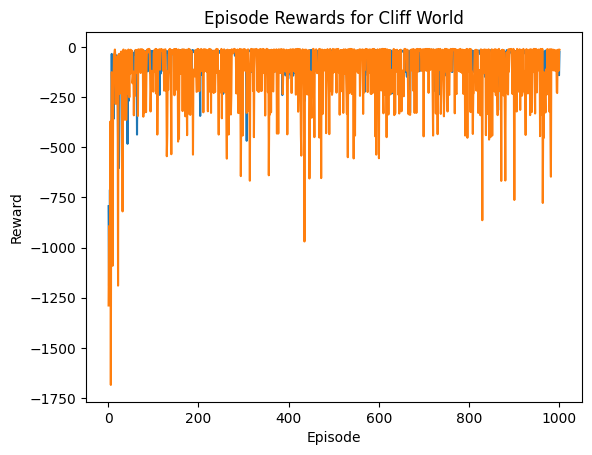

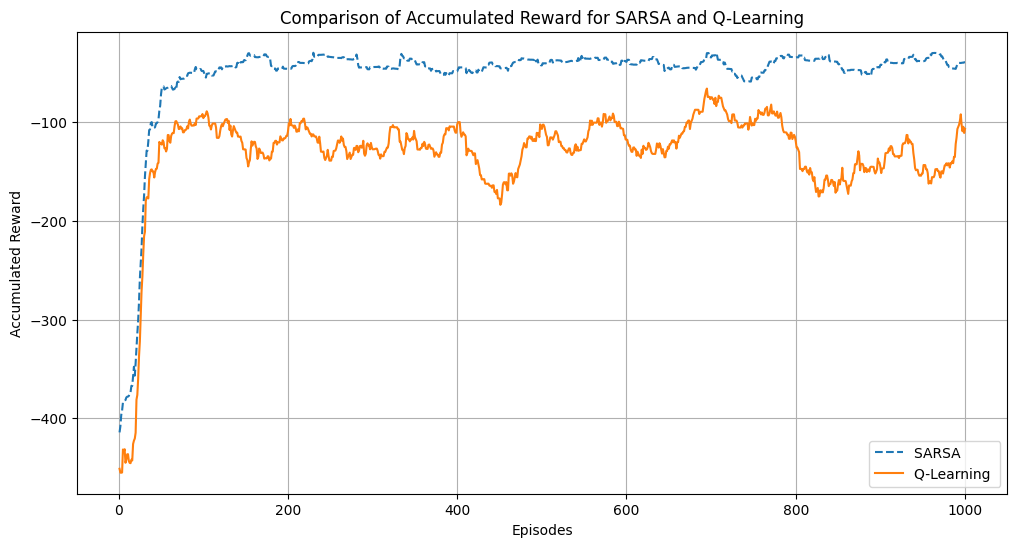

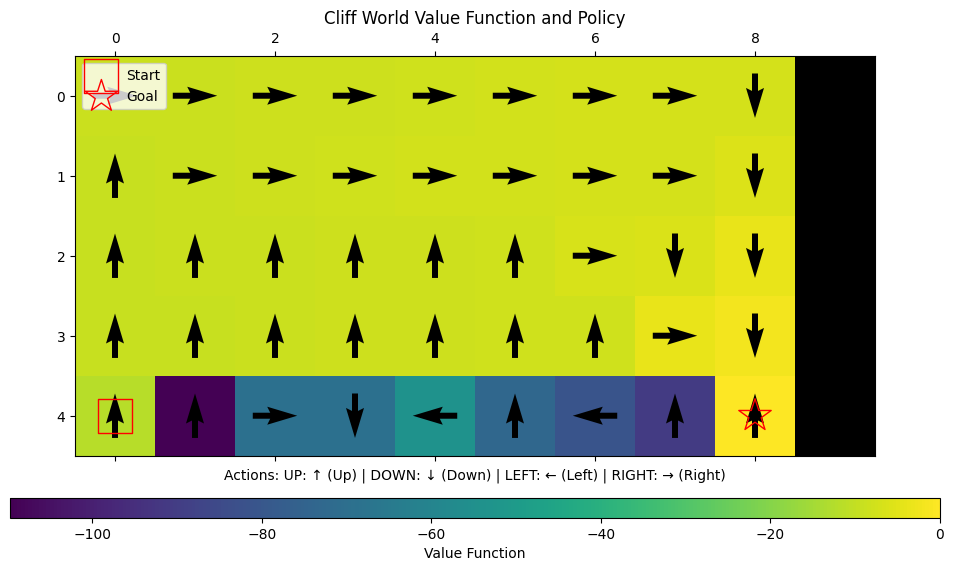

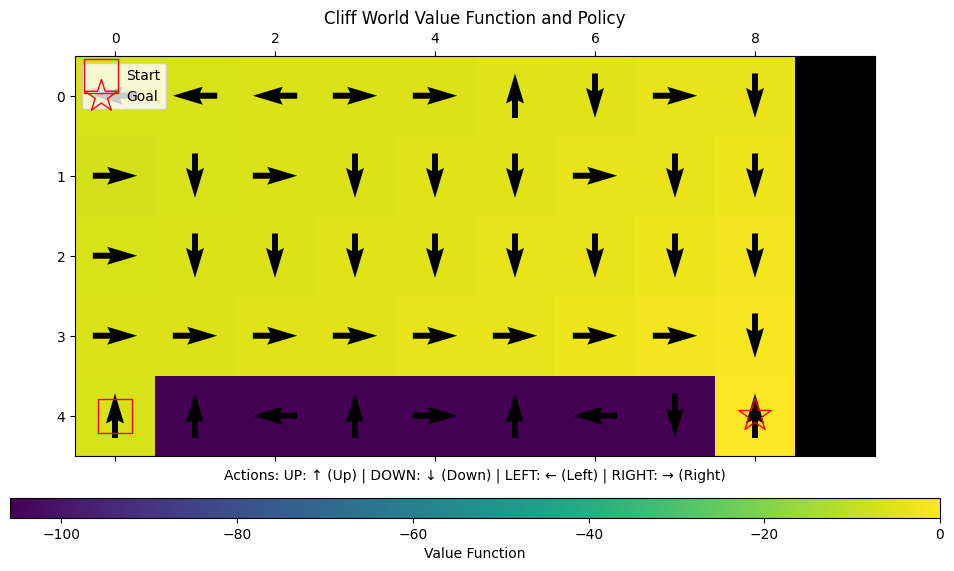

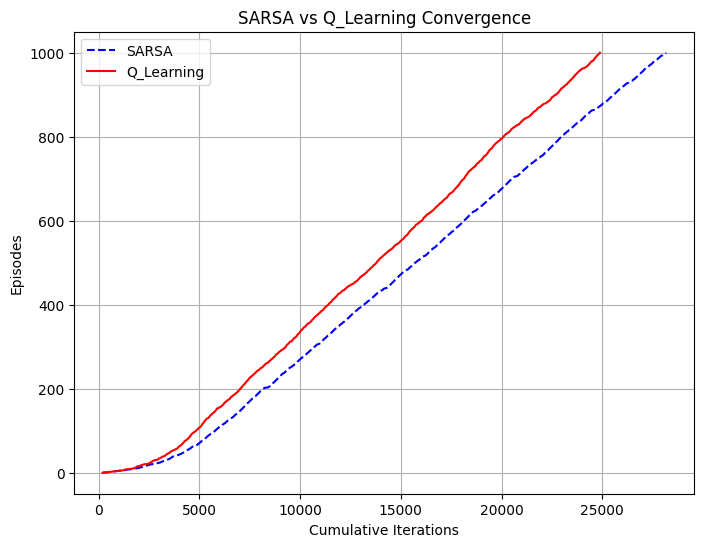

100%|██████████| 1000/1000 [00:36<00:00, 27.74it/s]


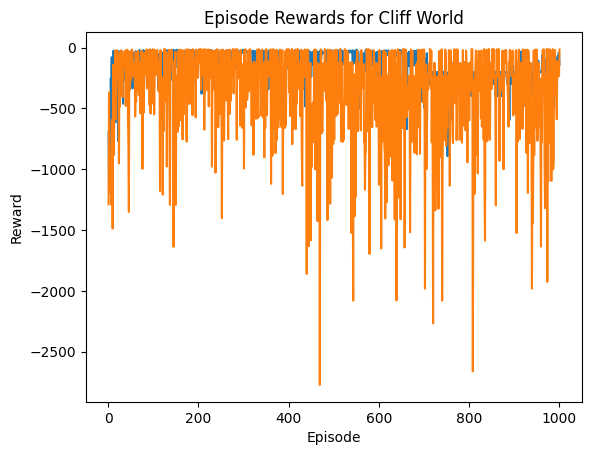

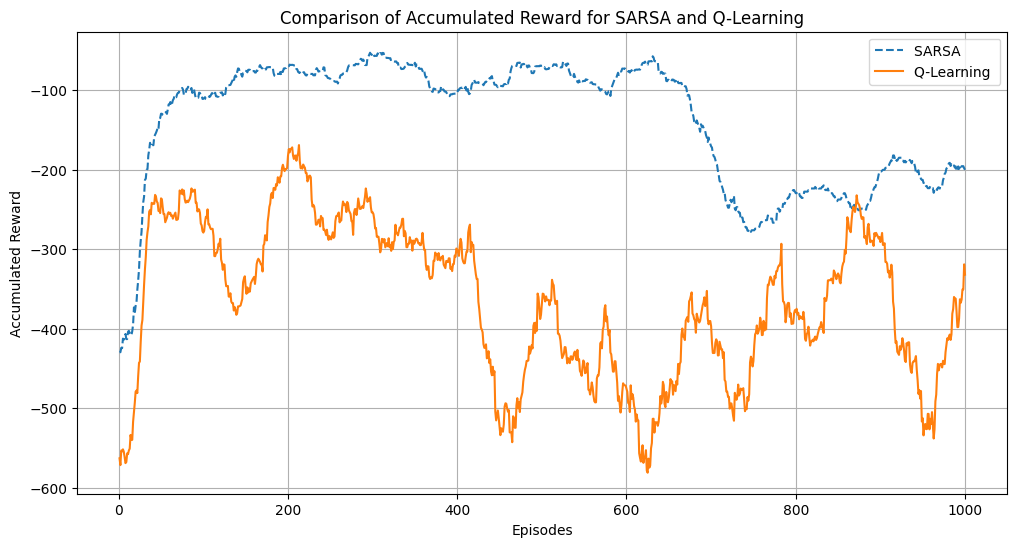

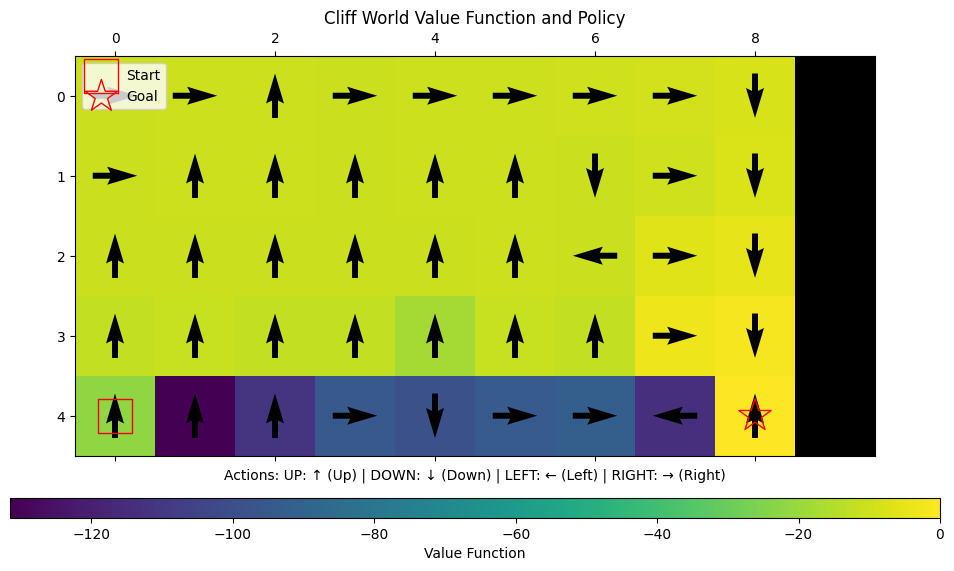

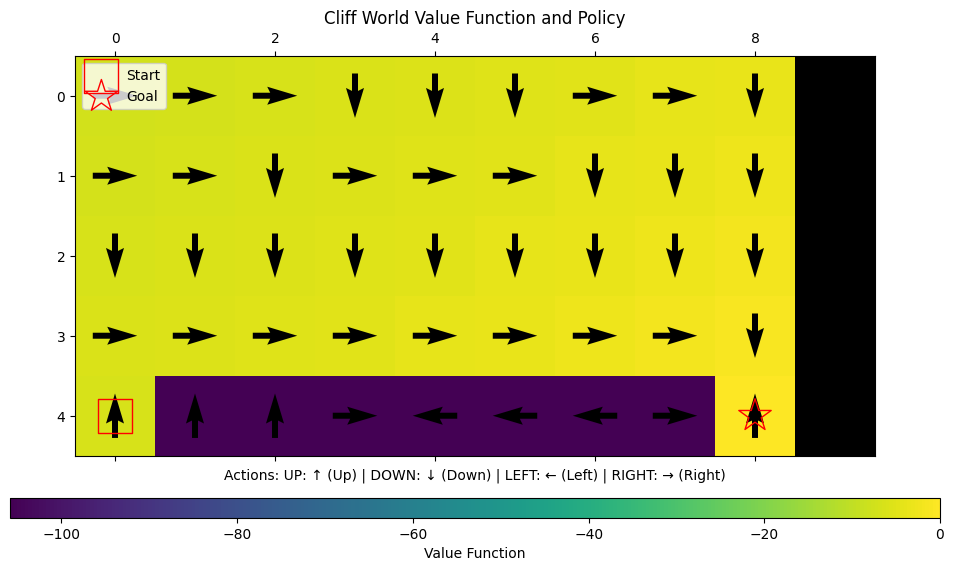

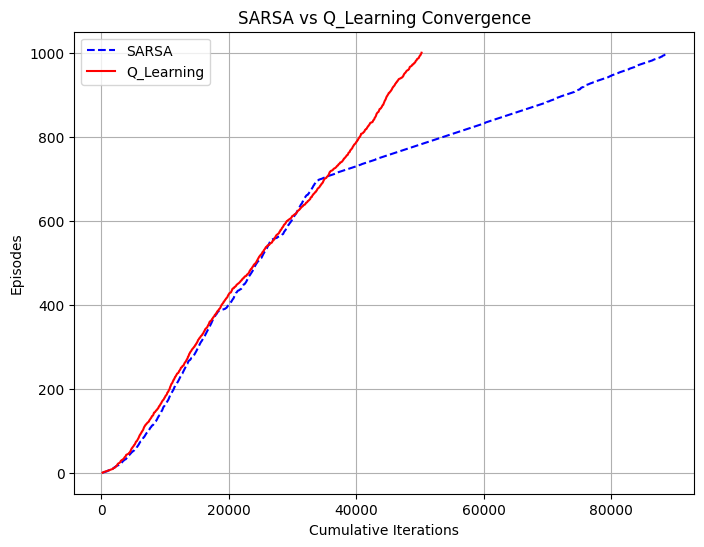

In [2]:
QUESTION_D = "QUESTION D"
show = True

# TODO: plot the episode vs total reward

world_model = [cliff_world]
# world_model = [cliff_world, small_world, grid_world]

epsilon_values = [0, 0.01, 0.1, 0.3, 0.5]
for i, model in enumerate(world_model):
    model = Model(model)
    wandb.init(
        project="MLMI7-RL",
        name=f"{model.world.world_name}_{QUESTION_D}",
    )
    for epsilon in epsilon_values:
        TASK_D_cum_reward = f"Sarsa_vs_Q_learning_cum_reward_{epsilon}"
        TASK_D_cum_reward_plot = f"Sarsa_vs_Q_learning_cum_reward_plot_{epsilon}"

        sarsa = Sarsa(model, model.world.world_name, maxit=200, episode=1000, alpha=0.3, epsilon=epsilon)
        q_learning = QL(model, model.world.world_name, maxit=200, episode=1000, alpha=0.3, epsilon=epsilon)
        
        Q, iter_history_sarsa, V, pi, rewards, iter_episdode = sarsa.on_policy_sarsa()
        ql, iter_snap_ql, V_ql, pi_ql, rewards_ql, iter_episdode_ql = q_learning.q_learning()
            
        reward_x, reward_y, reward_x_exp, reward_y_exp = plot_reward_comparison(rewards, rewards_ql, model.world.world_name, QUESTION_D, TASK_D_cum_reward, show=show, save= True)
        plot_accumulated_reward(rewards, rewards_ql, episodes=1000,question=QUESTION_D, world_name=model.world.world_name, task=TASK_D_cum_reward_plot, save=True)
        plot_vp(model, V, pi, model.world.world_name, QUESTION_D, TASK_D_cum_reward, show=show, save= True)
        plot_vp(model, V_ql, pi_ql, model.world.world_name, QUESTION_D, TASK_D_cum_reward, show=show, save= True)
        # conv_x, conv_y = plot_sarsa_convergence(iter_episdode_exp_sarsa, model.world.world_name, QUESTION_B3, TASK_B3_SARSA, save=True)
        x_sarsa, y_sarsa, x_exp_ql, y_exp_ql = plot_sarsa_comparison_convergence(iter_episdode, iter_episdode_ql, model.world.world_name, QUESTION_D, TASK_D_cum_reward, save=True)
        for i in range(len(reward_x)):
            wandb.log({
                "Q_max": np.max(Q),
                "Q_max_exp": np.max(ql),
                "reward_x": reward_x[i],
                "reward_y": reward_y[i],
                "conv_x": x_sarsa[i],
                "conv_y": y_sarsa[i],
                "reward_x_exp": reward_x_exp[i],
                "reward_y_exp": reward_y_exp[i],
                "conv_x_exp": x_exp_ql[i],
                "conv_y_exp": y_exp_ql[i],
            })
        
    wandb.finish()  # Finish the W&B run for this model before starting the next one


## Question E (20%)

Consider a variant of small_world where the 3 barrier cells only sometimes contain barriers. In each episode, whether each of the 3 cells contains a barrier is sampled at independently at uniform random and remains fixed throughout the episode. The new state space is $\bar{\mathcal{S}} = \mathcal{S} \times \mathbb{Z}_2^3$, so that
agent knows not only its current location, but also which cells contain barriers. 

1. Explain why function approximation could be useful in this environment. 
2. Would linear function approximation suffice?
Why or why not?
